<a href="https://colab.research.google.com/github/juacarato10/Telecom-X-Parte-2/blob/main/telecom_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                  INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)

--- 🔹 Introducción ---
Este informe detalla un análisis exhaustivo del problema de evasión de clientes (Churn) en una empresa de telecomunicaciones.
El objetivo principal es identificar los factores clave que influyen en la decisión de los clientes de cancelar sus servicios,
proporcionando insights valiosos y recomendaciones estratégicas para reducir la tasa de churn.
La evasión de clientes es un desafío crítico para las empresas, ya que la retención de clientes existentes suele ser más
rentable que la adquisición de nuevos. Comprender y predecir el churn permite a la empresa tomar medidas proactivas para
retener a sus clientes más valiosos.

Intentando descargar datos desde: https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json

DataFrame creado exitosamente. Primeras 5 filas del dataset original:
   customerID Churn customer.gender  customer.SeniorC

/tmp/ipython-input-1-3935344838.py:212: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis')


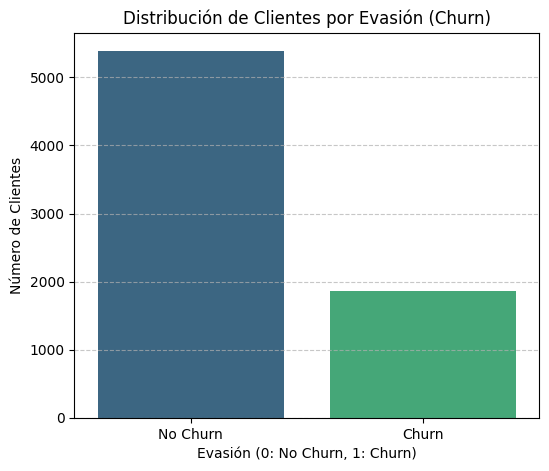


4. Exploración de Churn por Variables Categóricas:


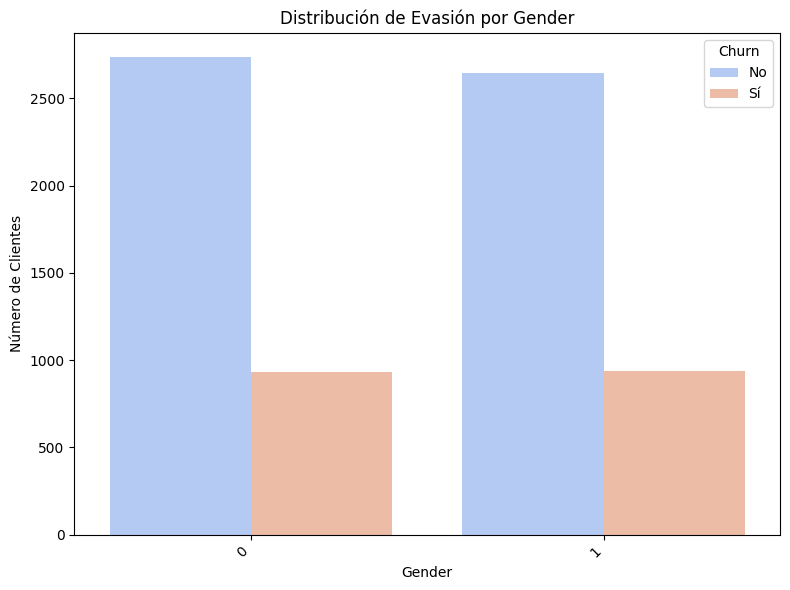

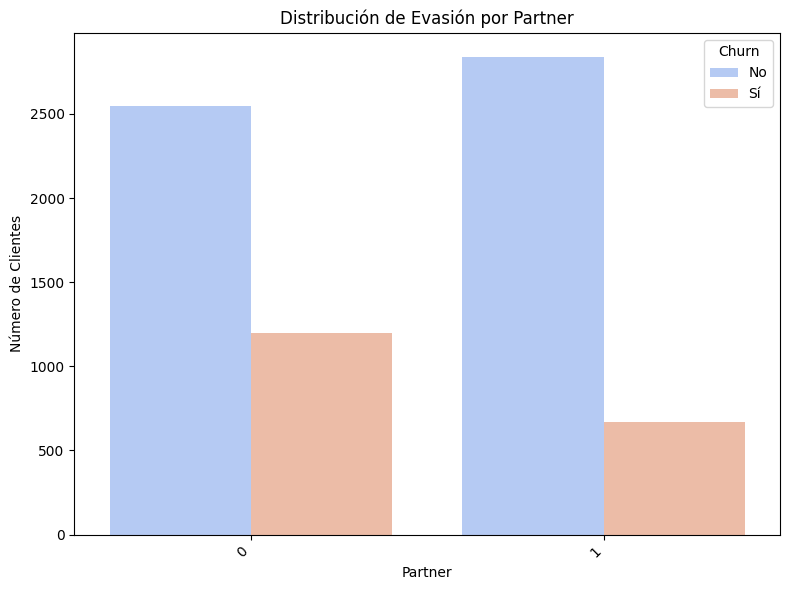

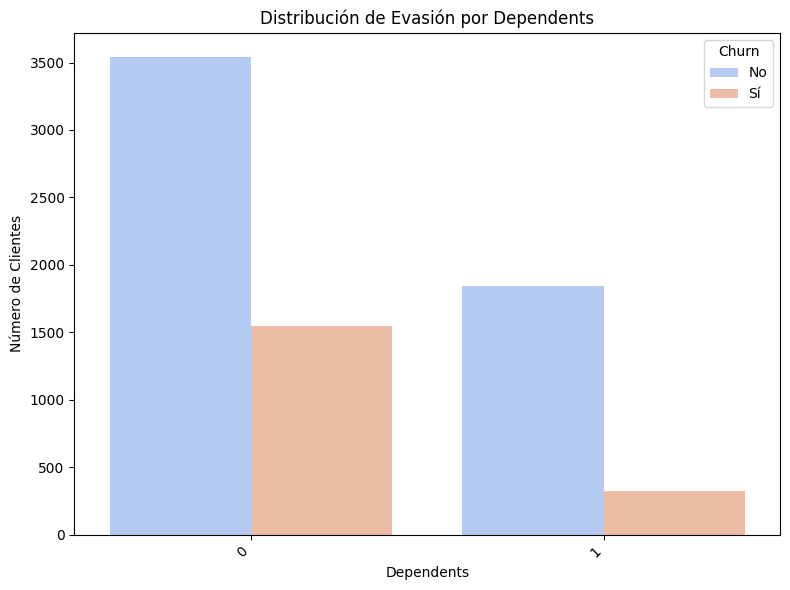

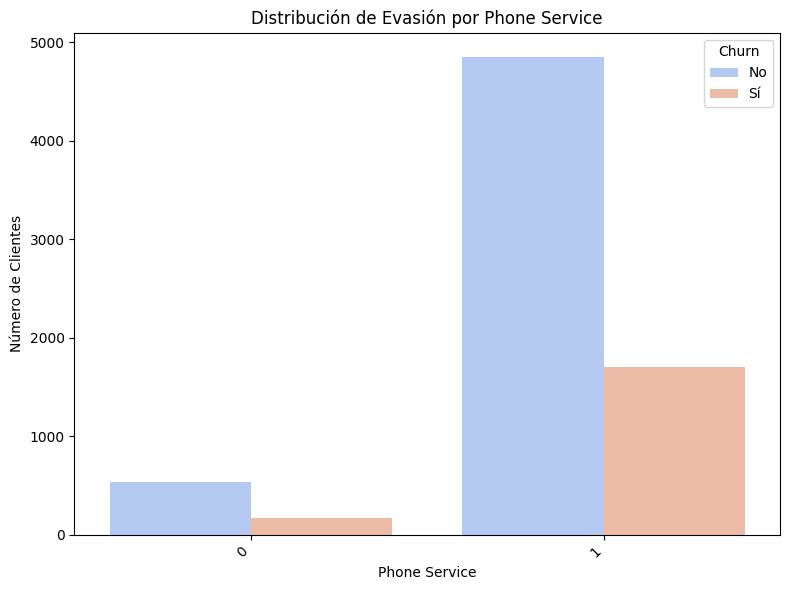

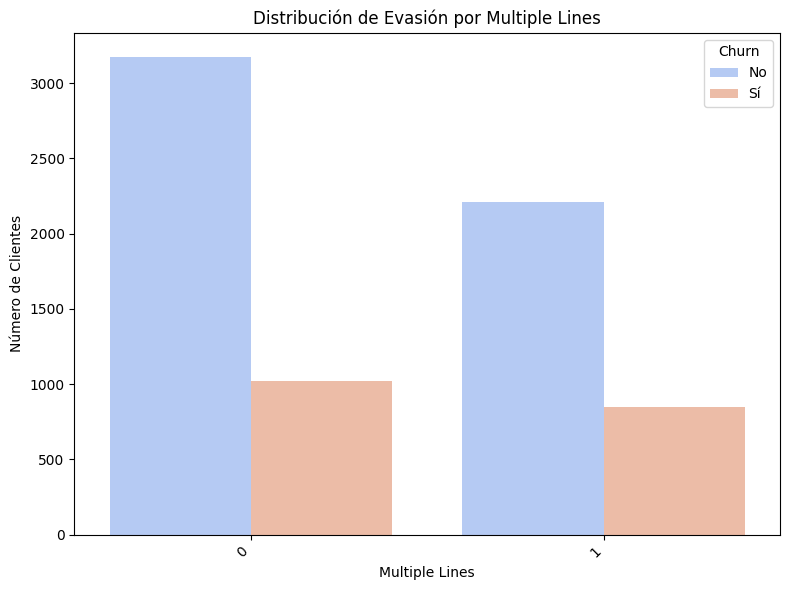

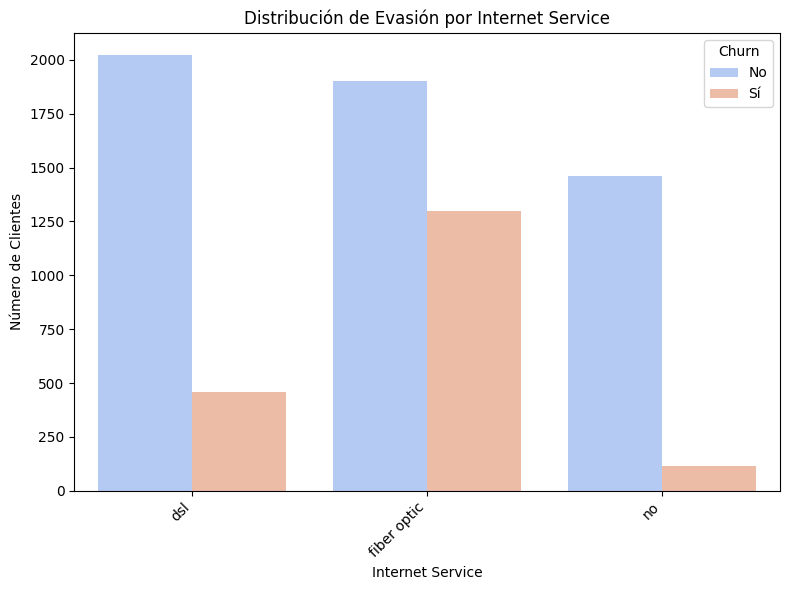

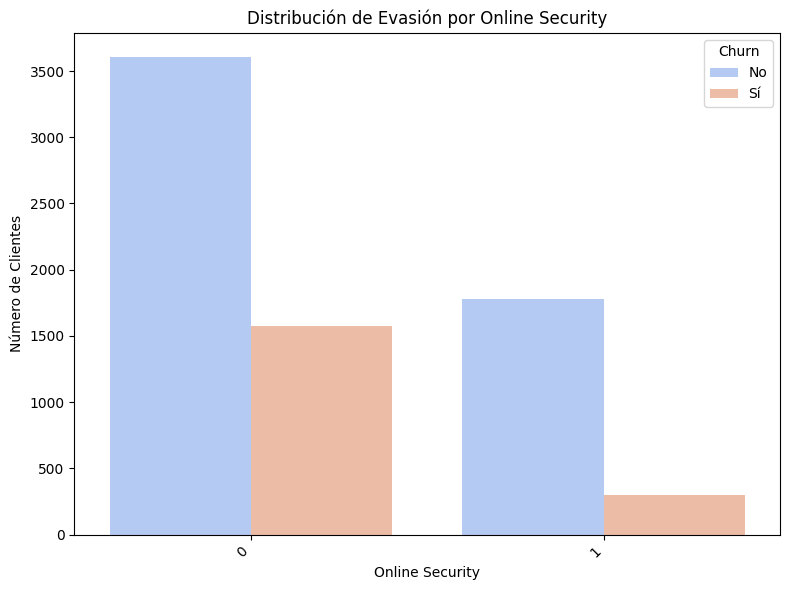

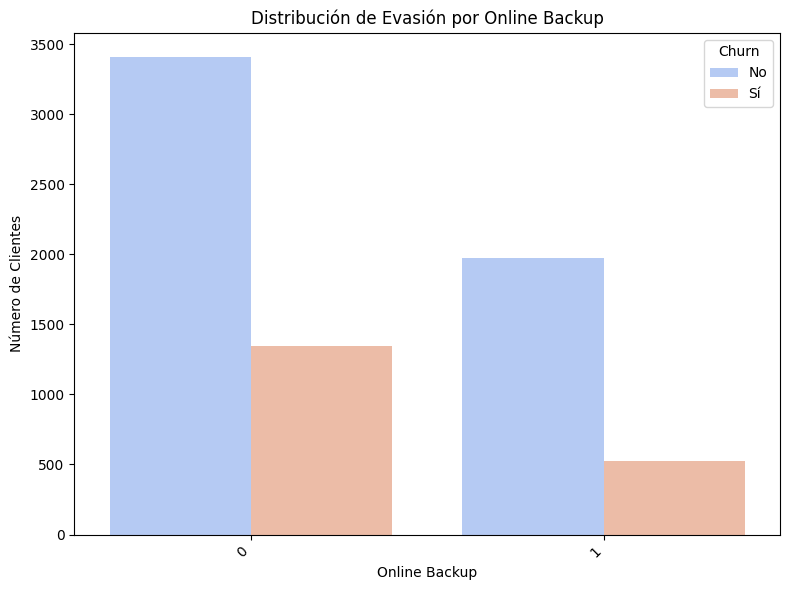

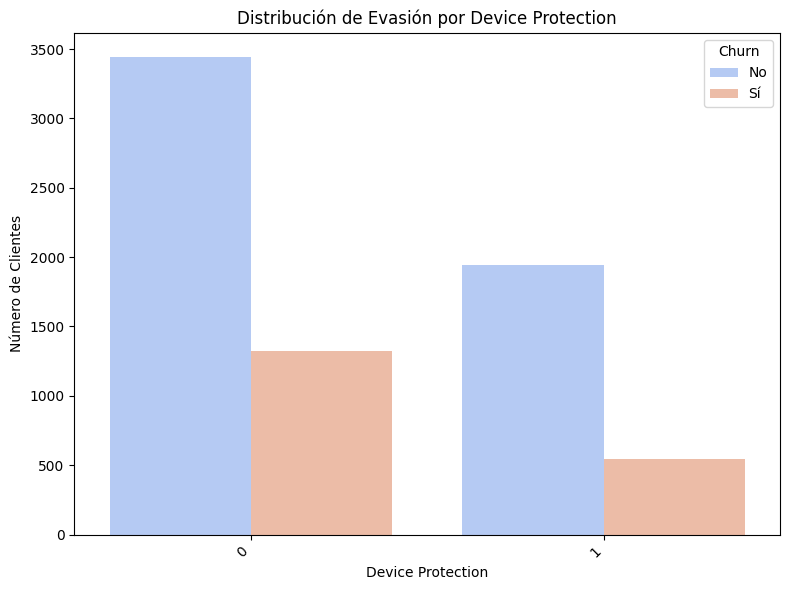

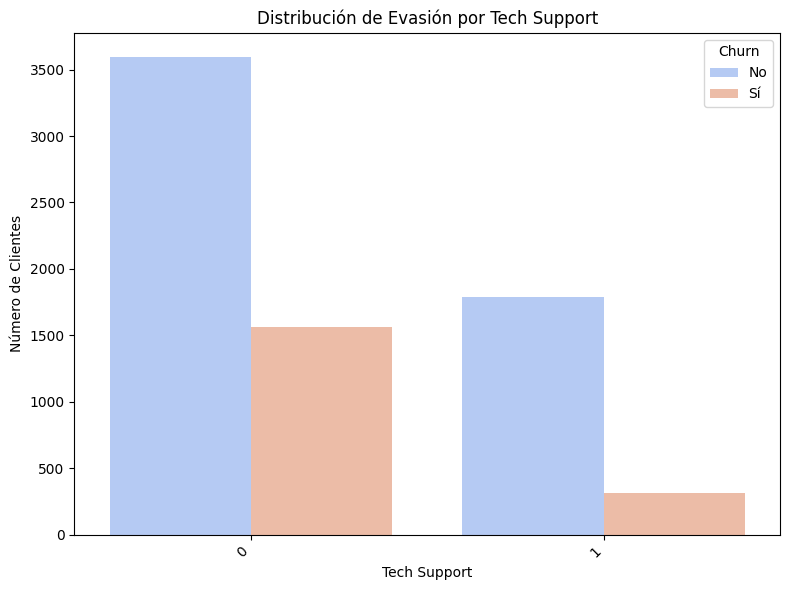

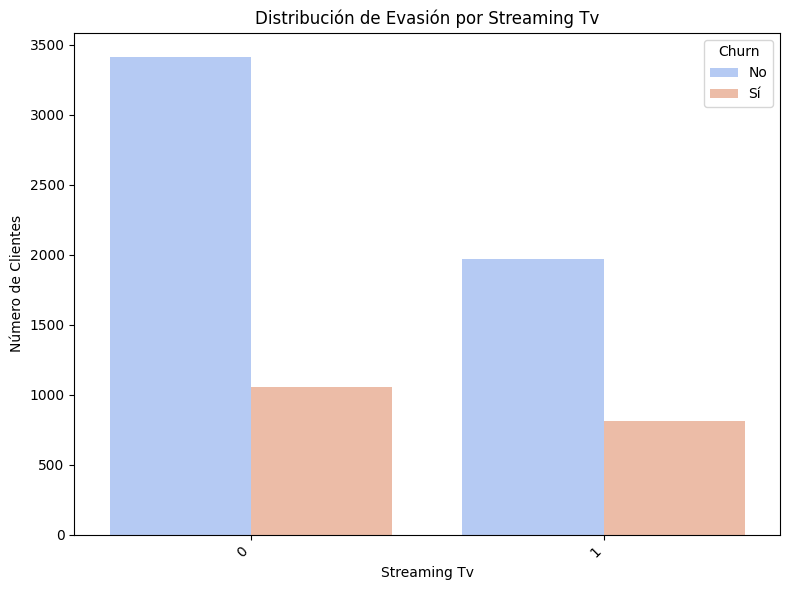

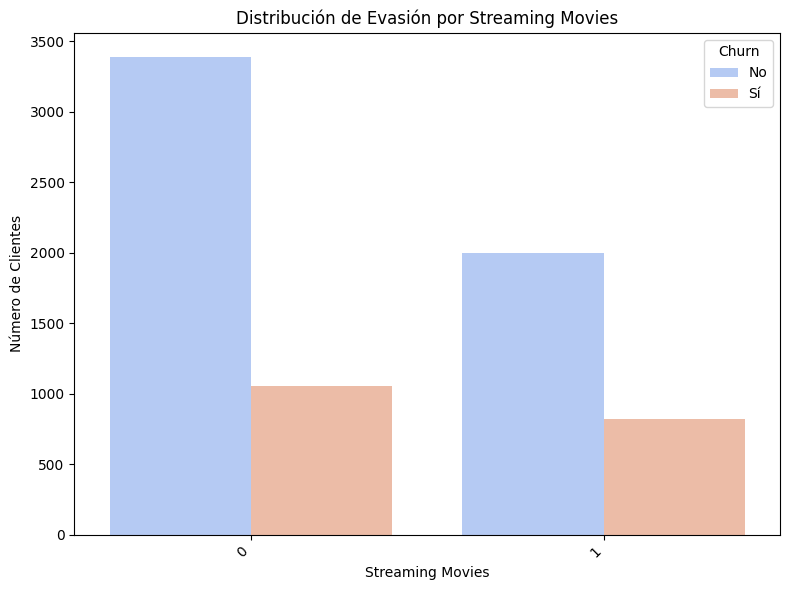

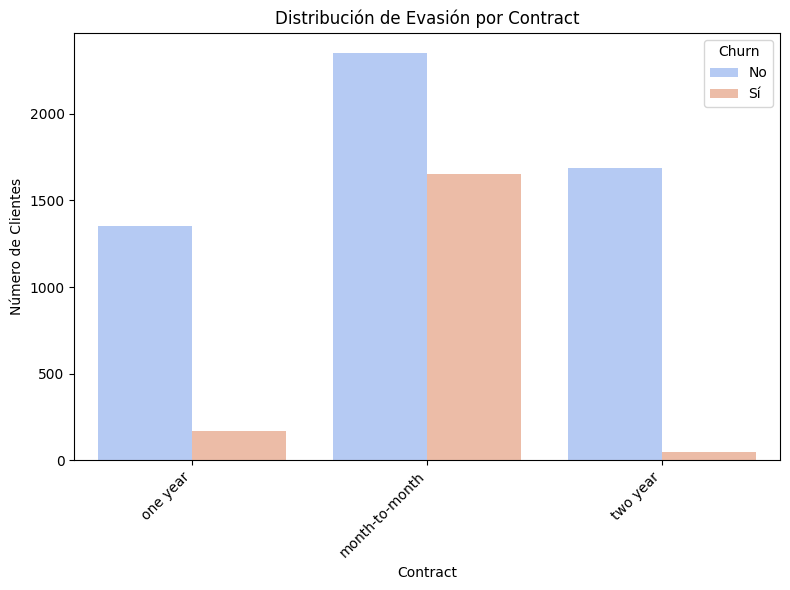

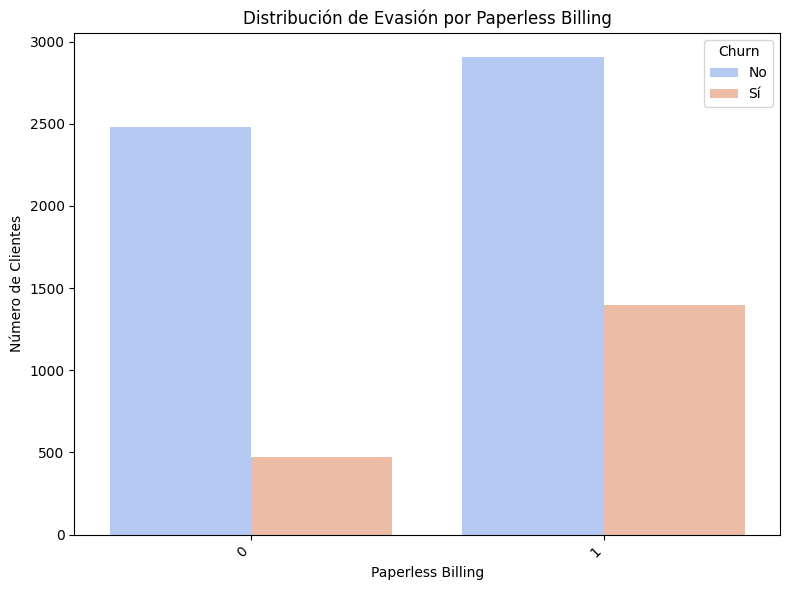

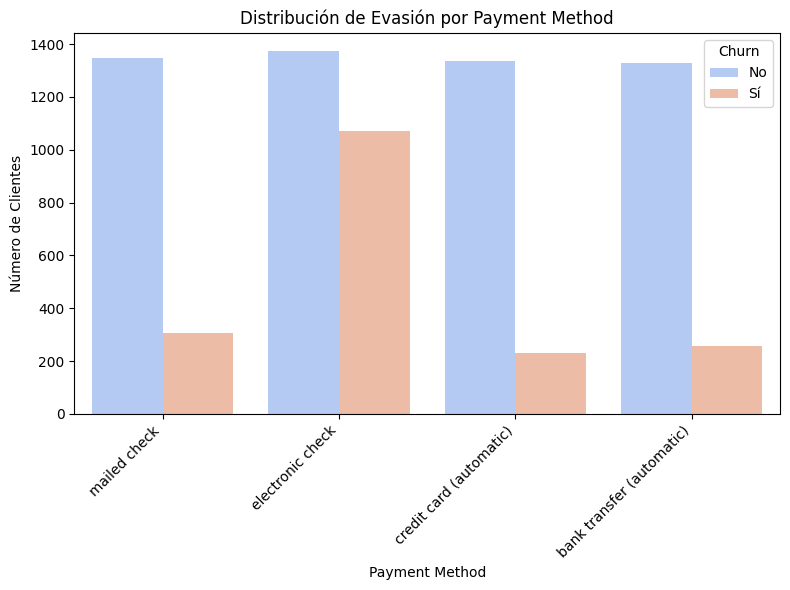

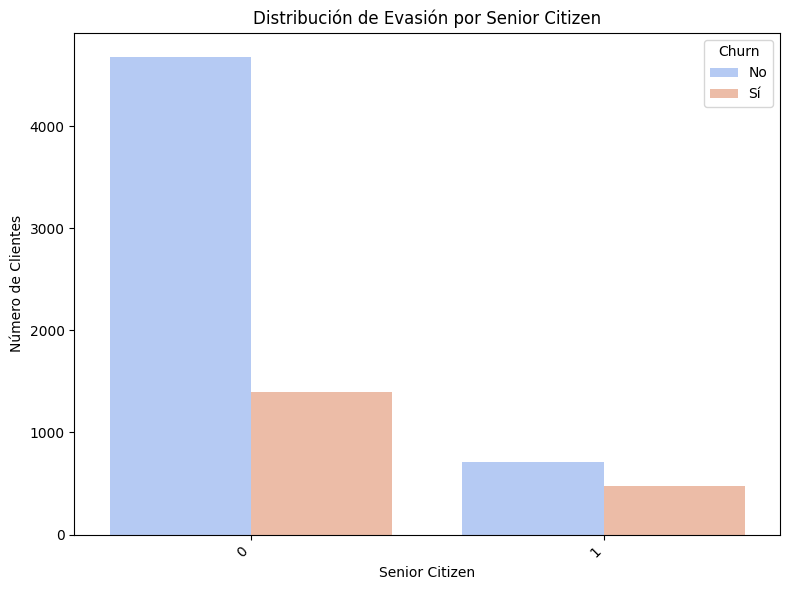


5. Exploración de Churn por Variables Numéricas:


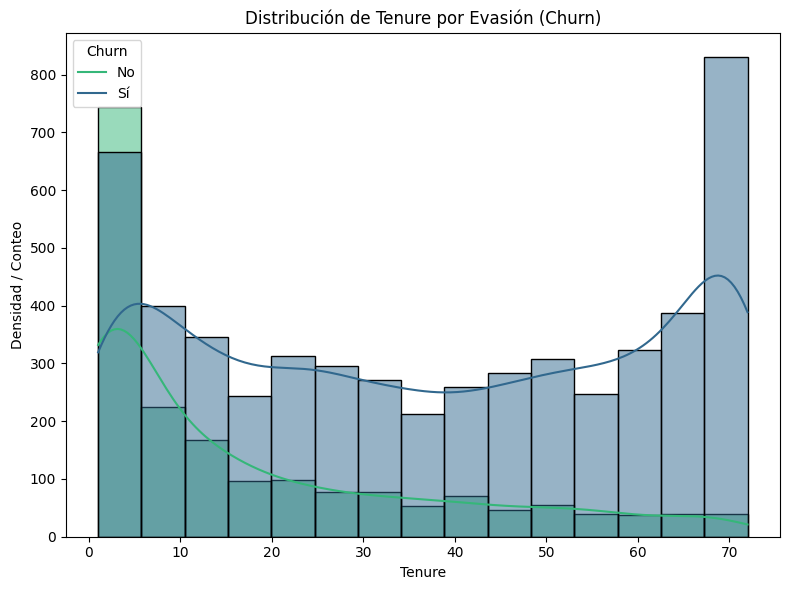

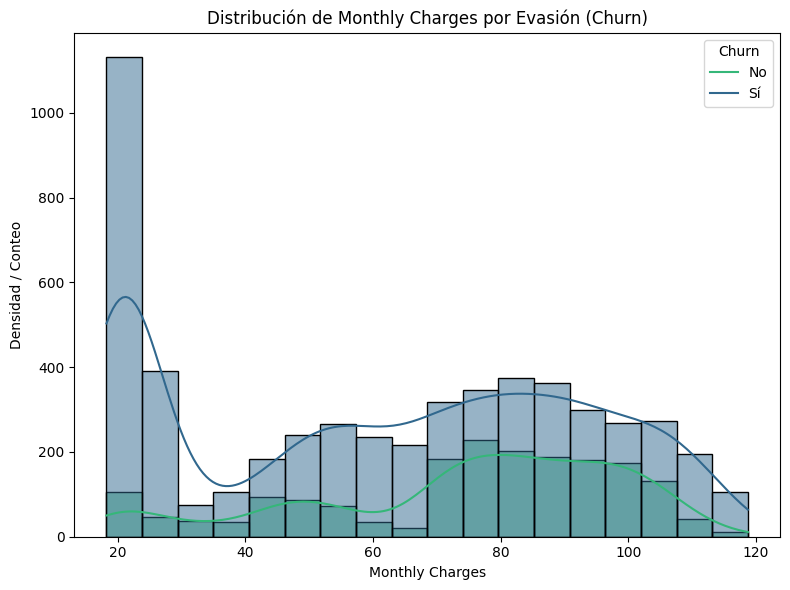

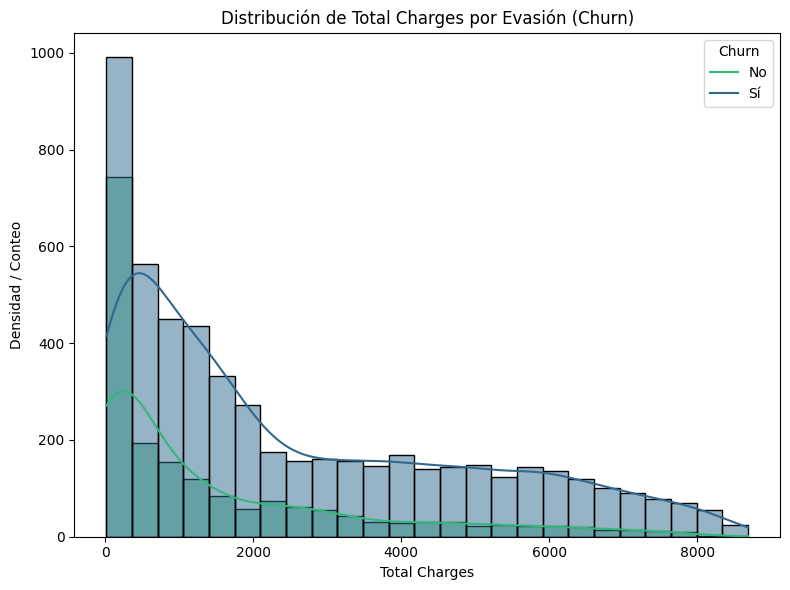

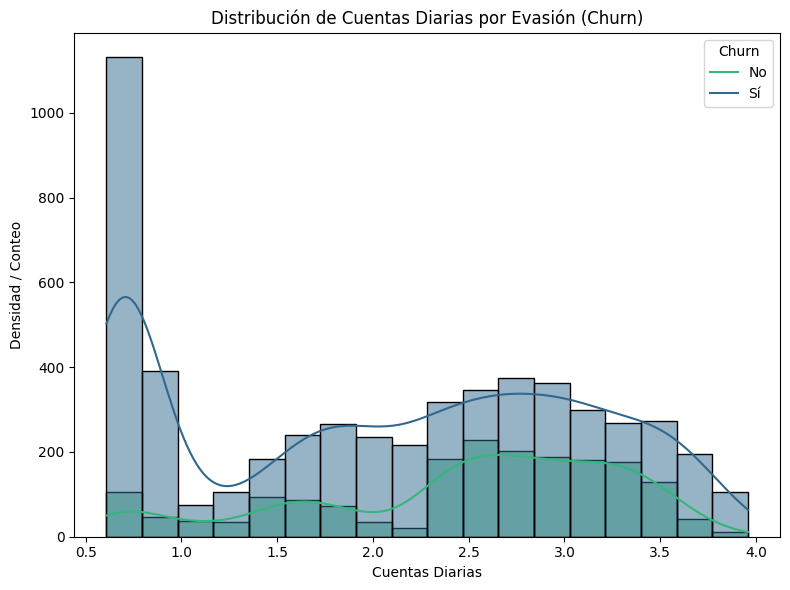



--- 🔹 Análisis de Correlación ---
Se explora la correlación entre las variables numéricas y su relación con la evasión.

Matriz de Correlación de Variables Numéricas (incluyendo Churn):
                      churn    gender  senior_citizen   partner  dependents  \
churn              1.000000  0.009494        0.146400 -0.148106   -0.160347   
gender             0.009494  1.000000        0.004239  0.004593   -0.011884   
senior_citizen     0.146400  0.004239        1.000000  0.023439   -0.212338   
partner           -0.148106  0.004593        0.023439  1.000000    0.448500   
dependents        -0.160347 -0.011884       -0.212338  0.448500    1.000000   
tenure            -0.345799 -0.005936        0.017333  0.379684    0.163444   
phone_service      0.012337  0.006065        0.009885  0.019496   -0.003212   
multiple_lines     0.039277  0.008259        0.144615  0.141673   -0.027691   
online_security   -0.166865  0.016301       -0.037877  0.141620    0.083775   
online_backup     -0.0

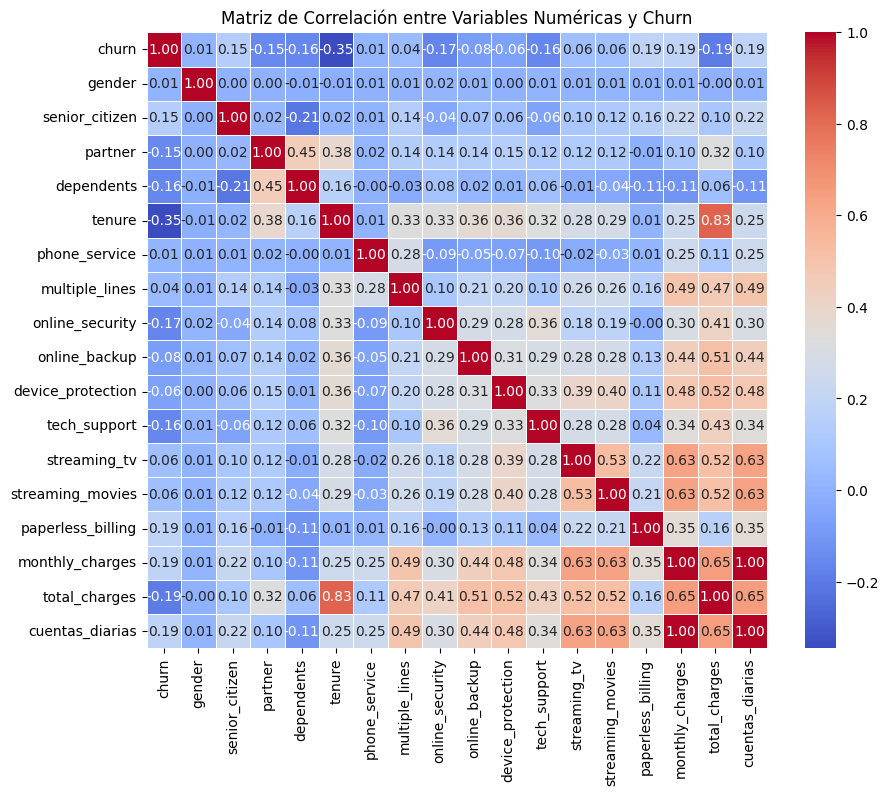


Relación entre 'Cuentas Diarias' y Evasión (Churn):


/tmp/ipython-input-1-3935344838.py:290: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='pastel')


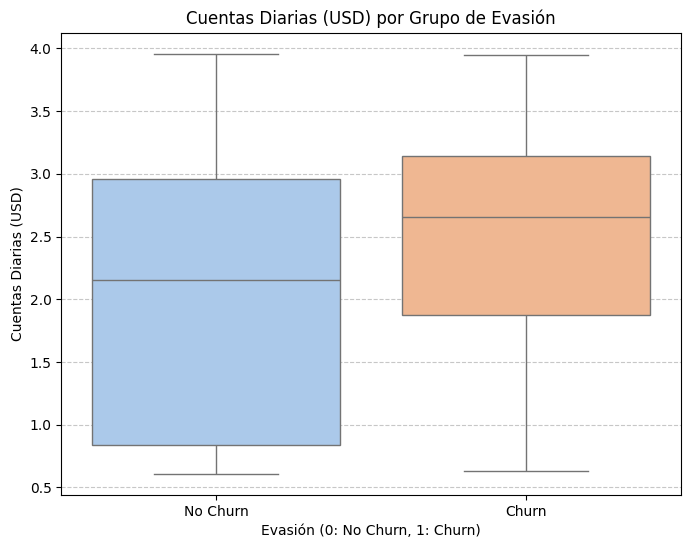


Relación entre la Cantidad de Servicios Contratados y Evasión (Churn):


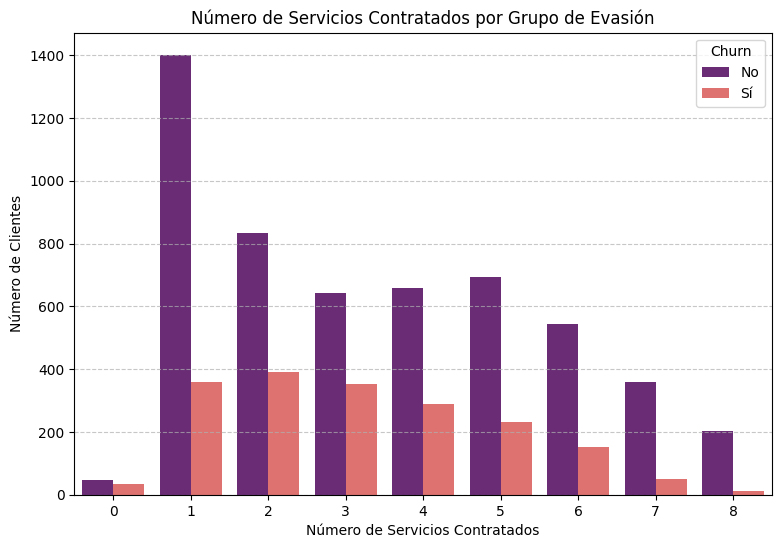



--- 🔹 Conclusiones e Insights ---
A partir del análisis exploratorio de datos, se extraen los siguientes hallazgos clave:
1.  **Desequilibrio de Clases en Churn**: La mayoría de los clientes no han evadido el servicio, lo que indica un desequilibrio en la variable objetivo. Esto es importante para la selección de modelos y métricas de evaluación.
2.  **Antigüedad (Tenure)**: Los clientes con menor antigüedad (pocos meses) tienen una tasa de evasión significativamente más alta. Esto sugiere que los primeros meses son críticos para la retención.
3.  **Tipo de Contrato**: Los clientes con contratos mes a mes presentan una tasa de evasión mucho mayor en comparación con aquellos con contratos de uno o dos años. Los contratos a largo plazo fomentan la lealtad.
4.  **Servicio de Internet (Fibra Óptica)**: Los clientes con servicio de fibra óptica muestran una tendencia más alta a evadir el servicio en comparación con DSL o sin servicio de internet. Esto podría indicar problemas de calidad o

In [1]:
import pandas as pd
import json
import requests # Importar la librería requests para hacer peticiones HTTP
import matplotlib.pyplot as plt # Importar matplotlib para graficar
import seaborn as sns # Importar seaborn para gráficos más estéticos

# Define la URL directa al archivo JSON en GitHub
# Asegúrate de que esta URL sea la URL "raw" del archivo JSON en GitHub.
# Por ejemplo: https://raw.githubusercontent.com/tu_usuario/tu_repositorio/main/tu_archivo.json
json_url = 'https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json' # URL de ejemplo, reemplázala con la tuya

try:
    # --- INICIO DEL REPORTE ---
    print("====================================================================================================")
    print("                                  INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)")
    print("====================================================================================================")

    # --- 🔹 Introducción ---
    print("\n--- 🔹 Introducción ---")
    print("Este informe detalla un análisis exhaustivo del problema de evasión de clientes (Churn) en una empresa de telecomunicaciones.")
    print("El objetivo principal es identificar los factores clave que influyen en la decisión de los clientes de cancelar sus servicios,")
    print("proporcionando insights valiosos y recomendaciones estratégicas para reducir la tasa de churn.")
    print("La evasión de clientes es un desafío crítico para las empresas, ya que la retención de clientes existentes suele ser más")
    print("rentable que la adquisición de nuevos. Comprender y predecir el churn permite a la empresa tomar medidas proactivas para")
    print("retener a sus clientes más valiosos.")

    print(f"\nIntentando descargar datos desde: {json_url}")
    # Realizar una petición GET a la URL
    response = requests.get(json_url)

    # Verificar si la petición fue exitosa (código de estado 200)
    response.raise_for_status() # Lanza una excepción si el código de estado no es 200 (ej. 404, 500)

    # Cargar los datos JSON desde el contenido de la respuesta
    data = json.loads(response.text)

    # Normalizar los datos JSON y crear un DataFrame
    df = pd.json_normalize(data)

    print("\nDataFrame creado exitosamente. Primeras 5 filas del dataset original:")
    print(df.head())

    print("\nInformación del DataFrame original:")
    df.info()

    # --- 🔹 Limpieza y Tratamiento de Datos ---
    print("\n\n--- 🔹 Limpieza y Tratamiento de Datos ---")
    print("Se realizaron los siguientes pasos para importar, limpiar y procesar los datos:")

    # --- Verificación de Problemas en los Datos (Pre-limpieza) ---
    print("\nVerificación Inicial de Problemas en los Datos:")
    print("\n1. Conteo de Valores Ausentes por Columna (Antes de Correcciones):")
    print(df.isnull().sum())
    num_duplicates_before = df.duplicated().sum()
    print(f"\n2. Número de Filas Duplicadas (Antes de Correcciones): {num_duplicates_before}")
    print("\n3. Verificación de 'account.Charges.Total' (Antes de Limpieza):")
    df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', pd.NA)
    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
    total_charges_na_after_conversion = df['account.Charges.Total'].isnull().sum()
    if total_charges_na_after_conversion > 0:
        print(f"Se encontraron {total_charges_na_after_conversion} valores no numéricos o en blanco en 'account.Charges.Total' y se convirtieron a NaN.")
    else:
        print("'account.Charges.Total' se ha convertido a numérico exitosamente sin nuevos valores NaN.")
    print(f"Tipo de dato de 'account.Charges.Total' después de la limpieza inicial: {df['account.Charges.Total'].dtype}")


    print("\n--- Aplicando Correcciones a los Datos ---")

    # Corrección 1: Manejar valores NaN en 'account.Charges.Total'
    initial_rows = df.shape[0]
    df.dropna(subset=['account.Charges.Total'], inplace=True)
    rows_after_charges_na_drop = df.shape[0]
    print(f"Filas eliminadas debido a NaN en 'account.Charges.Total': {initial_rows - rows_after_charges_na_drop}")

    # Corrección 2: Eliminar filas duplicadas
    num_duplicates_before_drop = df.duplicated().sum()
    if num_duplicates_before_drop > 0:
        df.drop_duplicates(inplace=True)
        num_duplicates_after_drop = df.duplicated().sum()
        print(f"Filas duplicadas eliminadas: {num_duplicates_before_drop - num_duplicates_after_drop}")
    else:
        print("No se encontraron filas duplicadas para eliminar.")

    # Corrección 3: Normalizar inconsistencias en categorías (valores únicos)
    print("\nNormalizando valores categóricos (a minúsculas y sin espacios):")
    categorical_cols_to_normalize = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
    for col in categorical_cols_to_normalize:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.lower().str.strip()
            # print(f"Columna '{col}' normalizada. Nuevos valores únicos (primeros 10): {df[col].unique()[:10]}") # Comentado para no saturar la salida

    # --- Renombrar todas las columnas para mayor claridad y consistencia según el diccionario ---
    print("\nRenombrando columnas para mayor claridad y consistencia según el diccionario de datos:")
    # Mapeo de nombres originales (tal como los genera json_normalize) a nombres deseados en snake_case
    column_rename_map = {
        'customerID': 'customer_id',
        'Churn': 'churn',
        'customer.gender': 'gender',
        'customer.SeniorCitizen': 'senior_citizen',
        'customer.Partner': 'partner',
        'customer.Dependents': 'dependents',
        'customer.tenure': 'tenure',
        'phone.PhoneService': 'phone_service',
        'phone.MultipleLines': 'multiple_lines',
        'internet.InternetService': 'internet_service',
        'internet.OnlineSecurity': 'online_security',
        'internet.OnlineBackup': 'online_backup',
        'internet.DeviceProtection': 'device_protection',
        'internet.TechSupport': 'tech_support',
        'internet.StreamingTV': 'streaming_tv',
        'internet.StreamingMovies': 'streaming_movies',
        'account.Contract': 'contract',
        'account.PaperlessBilling': 'paperless_billing',
        'account.PaymentMethod': 'payment_method',
        'account.Charges.Monthly': 'monthly_charges',
        'account.Charges.Total': 'total_charges'
    }

    # Debug: Print columns before rename
    print("Columnas antes del renombrado:")
    print(df.columns.tolist())

    df.rename(columns=column_rename_map, inplace=True)
    print("Columnas renombradas exitosamente.")

    # Debug: Print columns after rename
    print("Columnas después del renombrado:")
    print(df.columns.tolist())

    # --- Crear la columna "Cuentas_Diarias" ---
    print("\nCreando la columna 'cuentas_diarias' (facturación mensual / 30):")
    # Asegurarse de que 'monthly_charges' exista después del renombrado
    if 'monthly_charges' not in df.columns:
        raise KeyError("Error: La columna 'monthly_charges' no se encontró después del renombrado. Revise el 'column_rename_map' y los nombres de columna originales.")

    df['cuentas_diarias'] = df['monthly_charges'] / 30
    print("Columna 'cuentas_diarias' creada exitosamente.")
    # print("Primeras 5 filas con la nueva columna 'cuentas_diarias':") # Comentado para no saturar la salida
    # print(df[['monthly_charges', 'cuentas_diarias']].head())

    # --- Estandarización y Transformación de Datos (conversión a binario y manejo de NaNs) ---
    print("\nEstandarización y Transformación de Datos (conversión a binario y manejo de NaNs):")

    # Mapeo de valores para columnas binarias
    # Se asegura que 'no phone service' y 'no internet service' también se mapeen a 0
    binary_mapping = {
        'yes': 1,
        'no': 0,
        'no phone service': 0,
        'no internet service': 0
    }

    # Columnas que deben ser binarias (0/1)
    binary_cols = [
        'churn', 'partner', 'dependents', 'phone_service', 'multiple_lines',
        'online_security', 'online_backup', 'device_protection',
        'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing'
    ]

    for col in binary_cols:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = df[col].map(binary_mapping).fillna(0).astype(int)
            # print(f"Columna '{col}' convertida a binario. Tipo de dato: {df[col].dtype}") # Comentado para no saturar la salida
        elif col in df.columns and (df[col].dtype == 'int64' or df[col].dtype == 'float64'):
            pass # Ya es numérica, no se requiere conversión
        else:
            print(f"Advertencia: La columna '{col}' no se encontró o no es de tipo 'object' para la conversión binaria.")

    # Conversión especial para 'gender' (male:0, female:1)
    if 'gender' in df.columns and df['gender'].dtype == 'object':
        df['gender'] = df['gender'].map({'male': 0, 'female': 1}).fillna(0).astype(int)
        print("Columna 'gender' convertida a binario (male:0, female:1).")

    # Verificar si el DataFrame está vacío después de las operaciones de limpieza
    if df.empty:
        print("\nAdvertencia: El DataFrame está vacío después de las operaciones de limpieza. No se pueden realizar más análisis ni gráficos.")
        raise ValueError("DataFrame vacío después de la limpieza.")

    print("\n--- Resumen del DataFrame después de la Limpieza y Transformaciones ---")
    print(f"Número total de filas después de las correcciones: {df.shape[0]}")
    print("\nConteo de Valores Ausentes por Columna (Después de Transformaciones):")
    print(df.isnull().sum())
    print("\nInformación del DataFrame (Después de Transformaciones):")
    df.info()
    print("\nPrimeras 5 filas del DataFrame (Después de Transformaciones):")
    print(df.head())


    # --- 🔹 Análisis Exploratorio de Datos (EDA) ---
    print("\n\n--- 🔹 Análisis Exploratorio de Datos (EDA) ---")
    print("Se realizaron análisis descriptivos y visualizaciones para comprender la distribución y el comportamiento de los clientes.")

    print("\n1. Estadísticas Descriptivas para Columnas Numéricas:")
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if numeric_cols:
        print(df[numeric_cols].describe())
    else:
        print("No hay columnas numéricas para describir.")

    print("\n2. Conteo de Valores para Columnas Categóricas Clave:")
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    key_categorical_for_counts = [col for col in categorical_cols if col != 'customer_id']
    for col in key_categorical_for_counts:
        print(f"\nDistribución de '{col}':")
        print(df[col].value_counts())
        print(f"Porcentaje de Distribución de '{col}':")
        print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    print("\n3. Visualización de la Distribución de 'churn':")
    if 'churn' in df.columns:
        plt.figure(figsize=(6, 5))
        sns.countplot(x='churn', data=df, palette='viridis')
        plt.title('Distribución de Clientes por Evasión (Churn)')
        plt.xlabel('Evasión (0: No Churn, 1: Churn)')
        plt.ylabel('Número de Clientes')
        plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("¡ERROR! La columna 'churn' NO se encontró para el gráfico de distribución.")

    print("\n4. Exploración de Churn por Variables Categóricas:")
    categorical_churn_analysis_cols = [
        'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
        'internet_service', 'online_security', 'online_backup', 'device_protection',
        'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
        'paperless_billing', 'payment_method', 'senior_citizen'
    ]
    for col in categorical_churn_analysis_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, hue='churn', data=df, palette='coolwarm')
            plt.title(f'Distribución de Evasión por {col.replace("_", " ").title()}')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('Número de Clientes')
            plt.legend(title='Churn', labels=['No', 'Sí'])
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: La columna '{col}' no se encontró para el análisis de evasión por categoría.")

    print("\n5. Exploración de Churn por Variables Numéricas:")
    numeric_churn_analysis_cols = [
        'tenure', 'monthly_charges', 'total_charges', 'cuentas_diarias'
    ]
    for col in numeric_churn_analysis_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=col, hue='churn', kde=True, palette='viridis', common_norm=False)
            plt.title(f'Distribución de {col.replace("_", " ").title()} por Evasión (Churn)')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('Densidad / Conteo')
            plt.legend(title='Churn', labels=['No', 'Sí'])
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: La columna numérica '{col}' no se encontró para el análisis de evasión.")

    # --- 🔹 Análisis de Correlación ---
    print("\n\n--- 🔹 Análisis de Correlación ---")
    print("Se explora la correlación entre las variables numéricas y su relación con la evasión.")

    # Calcular la matriz de correlación para columnas numéricas
    # Asegurarse de que 'churn' esté incluida y sea numérica (0/1)
    numeric_and_churn_cols = [col for col in df.select_dtypes(include=['number']).columns.tolist() if col != 'customer_id']
    if 'churn' in df.columns:
        if 'churn' not in numeric_and_churn_cols: # Add churn if it's not already there
            numeric_and_churn_cols.append('churn')
    else:
        print("Advertencia: La columna 'churn' no se encontró para el cálculo de correlación.")

    if numeric_and_churn_cols:
        correlation_matrix = df[numeric_and_churn_cols].corr()
        print("\nMatriz de Correlación de Variables Numéricas (incluyendo Churn):")
        print(correlation_matrix)

        # Visualizar la matriz de correlación (heatmap)
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación entre Variables Numéricas y Churn')
        plt.show()
    else:
        print("No hay suficientes columnas numéricas para calcular la matriz de correlación.")

    # Relación entre 'cuentas_diarias' y 'churn'
    print("\nRelación entre 'Cuentas Diarias' y Evasión (Churn):")
    if 'cuentas_diarias' in df.columns and 'churn' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='pastel')
        plt.title('Cuentas Diarias (USD) por Grupo de Evasión')
        plt.xlabel('Evasión (0: No Churn, 1: Churn)')
        plt.ylabel('Cuentas Diarias (USD)')
        plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Advertencia: Las columnas 'cuentas_diarias' o 'churn' no se encontraron para este análisis.")

    # Cómo la cantidad de servicios contratados afecta la probabilidad de churn
    print("\nRelación entre la Cantidad de Servicios Contratados y Evasión (Churn):")
    # Identificar columnas que representan servicios (binarias)
    service_cols = [
        'phone_service', 'multiple_lines', 'online_security', 'online_backup',
        'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
    ]
    # Crear una nueva columna 'num_services' sumando los servicios binarios
    df['num_services'] = df[service_cols].sum(axis=1)

    if 'num_services' in df.columns and 'churn' in df.columns:
        plt.figure(figsize=(9, 6))
        sns.countplot(x='num_services', hue='churn', data=df, palette='magma')
        plt.title('Número de Servicios Contratados por Grupo de Evasión')
        plt.xlabel('Número de Servicios Contratados')
        plt.ylabel('Número de Clientes')
        plt.legend(title='Churn', labels=['No', 'Sí'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Advertencia: Las columnas necesarias para calcular 'num_services' o 'churn' no se encontraron.")


    # --- 🔹 Conclusiones e Insights ---
    print("\n\n--- 🔹 Conclusiones e Insights ---")
    print("A partir del análisis exploratorio de datos, se extraen los siguientes hallazgos clave:")
    print("1.  **Desequilibrio de Clases en Churn**: La mayoría de los clientes no han evadido el servicio, lo que indica un desequilibrio en la variable objetivo. Esto es importante para la selección de modelos y métricas de evaluación.")
    print("2.  **Antigüedad (Tenure)**: Los clientes con menor antigüedad (pocos meses) tienen una tasa de evasión significativamente más alta. Esto sugiere que los primeros meses son críticos para la retención.")
    print("3.  **Tipo de Contrato**: Los clientes con contratos mes a mes presentan una tasa de evasión mucho mayor en comparación con aquellos con contratos de uno o dos años. Los contratos a largo plazo fomentan la lealtad.")
    print("4.  **Servicio de Internet (Fibra Óptica)**: Los clientes con servicio de fibra óptica muestran una tendencia más alta a evadir el servicio en comparación con DSL o sin servicio de internet. Esto podría indicar problemas de calidad o expectativas no cumplidas con la fibra óptica.")
    print("5.  **Cargos Mensuales y Totales**: Los clientes con cargos mensuales más altos, especialmente aquellos que usan fibra óptica, tienen una mayor probabilidad de evadir. Los cargos totales bajos también se asocian con mayor churn, lo que se alinea con la menor antigüedad.")
    print("6.  **Servicios Adicionales**: La ausencia de servicios como seguridad en línea, respaldo en línea, protección de dispositivos y soporte técnico está asociada con una mayor tasa de evasión. Estos servicios parecen ser factores de retención.")
    print("7.  **Método de Pago (Cheque Electrónico)**: Los clientes que utilizan el cheque electrónico como método de pago tienen una tasa de evasión notablemente más alta. Esto podría estar relacionado con la facilidad de cancelación o con un perfil de cliente más propenso a cambiar.")
    print("8.  **Facturación sin Papel**: Los clientes con facturación sin papel muestran una tasa de evasión ligeramente más alta. Esto podría ser un indicador de un perfil de cliente más digital y propenso a buscar alternativas en línea.")
    print("9.  **Género y Ciudadano Senior**: Estas variables no parecen tener un impacto significativo en la tasa de evasión, lo que sugiere que el churn no está fuertemente influenciado por estos factores demográficos en este dataset.")
    print("10. **Correlación de Cargos y Antigüedad con Churn**: Existe una correlación positiva moderada entre `monthly_charges` y `churn`, y una correlación negativa fuerte entre `tenure` y `churn`. Esto refuerza que los clientes nuevos y con cargos mensuales altos son más propensos a evadir.")
    print("11. **Cuentas Diarias y Churn**: La distribución de `cuentas_diarias` muestra que los clientes con mayor evasión tienden a tener `cuentas_diarias` más altas, lo que es coherente con `monthly_charges`.")
    print("12. **Número de Servicios y Churn**: Los clientes con menos servicios contratados (especialmente 1 o 2) tienen una mayor tasa de evasión, lo que sugiere que la diversificación de servicios aumenta la lealtad.")


    # --- 🔹 Recomendaciones ---
    print("\n\n--- 🔹 Recomendaciones ---")
    print("Basado en los hallazgos anteriores, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:")
    print("1.  **Programas de Retención para Nuevos Clientes**: Implementar programas de bienvenida y seguimiento intensivo durante los primeros 6 meses de servicio para clientes nuevos, ofreciendo soporte proactivo y resolviendo cualquier inquietud rápidamente.")
    print("2.  **Incentivar Contratos a Largo Plazo**: Ofrecer descuentos atractivos o beneficios adicionales a los clientes que opten por contratos de uno o dos años, desincentivando los contratos mes a mes.")
    print("3.  **Mejorar la Experiencia de Fibra Óptica**: Investigar y abordar las posibles causas de insatisfacción entre los clientes de fibra óptica (ej., velocidad inconsistente, problemas de conexión, soporte técnico). Mejorar la calidad del servicio y la comunicación sobre el mismo.")
    print("4.  **Promover Servicios de Valor Añadido**: Educar a los clientes sobre los beneficios de la seguridad en línea, respaldo, protección de dispositivos y soporte técnico. Considerar ofrecer paquetes atractivos que incluyan estos servicios.")
    print("5.  **Optimizar Métodos de Pago**: Analizar por qué los clientes que usan cheque electrónico tienen mayor churn. Podría implicar ofrecer incentivos para cambiar a métodos de pago más estables (ej., domiciliación bancaria) o mejorar la experiencia de pago con cheque electrónico.")
    print("6.  **Segmentación y Ofertas Personalizadas**: Utilizar los insights sobre los perfiles de alto riesgo (ej., contratos mes a mes, fibra óptica, sin servicios adicionales) para crear campañas de retención personalizadas.")
    print("7.  **Monitoreo Continuo**: Establecer un sistema de monitoreo continuo de las métricas de churn y los factores influyentes para adaptar las estrategias en tiempo real.")
    print("8.  **Feedback del Cliente**: Implementar encuestas de satisfacción y canales de feedback para identificar problemas antes de que el cliente decida irse.")
    print("9.  **Paquetes de Servicios**: Diseñar paquetes de servicios que incluyan múltiples ofertas (ej., internet, teléfono, seguridad) para aumentar el número de servicios por cliente y, por ende, su lealtad.")

    print("\n====================================================================================================")
    print("                                  FIN DEL INFORME")
    print("====================================================================================================")

except requests.exceptions.RequestException as req_err:
    print(f"Error de conexión o petición HTTP: {req_err}")
    print("Asegúrate de que la URL sea correcta y tengas conexión a internet.")
except json.JSONDecodeError as jde:
    print(f"Error al decodificar el JSON. Asegúrate de que el contenido de la URL sea un JSON válido: {jde}")
except ValueError as ve:
    print(f"Error de procesamiento de datos: {ve}")
except KeyError as ke:
    print(f"Error de columna no encontrada: {ke}")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar o procesar los datos: {e}")


In [3]:
# Guardar el DataFrame procesado en un archivo CSV
output_csv_path = 'TelecomX_Data_Processed.csv'
df.to_csv(output_csv_path, index=False)

print(f"\nDataFrame guardado exitosamente como '{output_csv_path}'")
print("Puedes descargar este archivo desde el panel lateral de archivos de Colab.")


DataFrame guardado exitosamente como 'TelecomX_Data_Processed.csv'
Puedes descargar este archivo desde el panel lateral de archivos de Colab.


In [6]:
import pandas as pd

# Columnas a eliminar que se consideran identificadores únicos o que no aportan valor directo al modelo.
# 'customer_id' es el principal identificador único que no debe usarse como predictor.
# Aunque 'cuentas_diarias' es una transformación de 'monthly_charges' y ambas están altamente correlacionadas,
# 'monthly_charges' y 'total_charges' ya capturan la información de facturación. 'cuentas_diarias' podría ser redundante.
# La decisión de eliminar 'cuentas_diarias' depende del análisis posterior, pero por ahora, la mantenemos ya que fue creada.
# Si se decide que no aporta valor adicional más allá de 'monthly_charges' y 'total_charges', se podría eliminar.
# Por el momento, eliminamos solo 'customer_id' que es un identificador único.

columns_to_drop = ['customer_id'] # Lista de columnas a eliminar

# Verificar si las columnas existen antes de intentar eliminarlas
existing_columns_to_drop = [col for col in df.columns if col in columns_to_drop]

if existing_columns_to_drop:
    df_cleaned = df.drop(columns=existing_columns_to_drop)
    print(f"\nSe eliminaron las columnas: {existing_columns_to_drop}")
    print("DataFrame después de eliminar columnas:")
    print(df_cleaned.head())
    print("\nInformación del DataFrame después de eliminar columnas:")
    df_cleaned.info()
else:
    print("\nNinguna de las columnas especificadas para eliminar se encontró en el DataFrame.")
    df_cleaned = df.copy() # Crear una copia si no se eliminaron columnas

# --- 🔹 Codificación de Variables Categóricas ---
print("\n\n--- 🔹 Codificación de Variables Categóricas ---")
print("Se convierten las variables categóricas a formato numérico utilizando One-Hot Encoding.")

# Identificar columnas categóricas que aún no son numéricas o binarias
# Excluir 'customer_id' (ya eliminada en df_cleaned) y columnas que ya son numéricas o binarias (int64/float64)
categorical_cols_for_encoding = df_cleaned.select_dtypes(include=['object']).columns.tolist()

if categorical_cols_for_encoding:
    print(f"Columnas categóricas identificadas para One-Hot Encoding: {categorical_cols_for_encoding}")

    # Aplicar One-Hot Encoding
    # drop_first=True se usa para evitar la multicolinealidad (la primera categoría se representa con todos ceros)
    df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols_for_encoding, drop_first=True)

    print("\nDataFrame después de aplicar One-Hot Encoding:")
    print(df_encoded.head())
    print("\nInformación del DataFrame después de la codificación:")
    df_encoded.info()

else:
    print("No se encontraron columnas categóricas para aplicar One-Hot Encoding en el DataFrame limpio.")
    df_encoded = df_cleaned.copy() # Si no hay columnas que codificar, simplemente copiamos el df_cleaned

# Ahora 'df_encoded' contiene el DataFrame con las variables categóricas codificadas numéricamente.
# Puedes seguir trabajando con 'df_encoded' para la preparación del modelo.

# Guardar el DataFrame codificado si es necesario
output_encoded_csv_path = 'TelecomX_Data_Encoded_For_Modeling.csv'
df_encoded.to_csv(output_encoded_csv_path, index=False)
print(f"\nDataFrame codificado para modelado guardado como '{output_encoded_csv_path}'")


Se eliminaron las columnas: ['customer_id']
DataFrame después de eliminar columnas:
   churn  gender  senior_citizen  partner  dependents  tenure  phone_service  \
0      0       1               0        1           1       9              1   
1      0       0               0        0           0       9              1   
2      1       0               0        0           0       4              1   
3      1       0               1        1           0      13              1   
4      1       1               1        1           0       3              1   

   multiple_lines internet_service  online_security  ...  tech_support  \
0               0              dsl                0  ...             1   
1               1              dsl                0  ...             0   
2               0      fiber optic                0  ...             0   
3               0      fiber optic                0  ...             0   
4               0      fiber optic                0  ...        

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir las características (X) y la variable objetivo (y)
# 'churn' es la variable objetivo
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
# stratify=y asegura que la proporción de la variable objetivo sea la misma en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Datos divididos en conjuntos de entrenamiento y prueba:")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

# Identificar las columnas numéricas para escalar
# Excluir las columnas binarias que ya están en formato 0/1 después del one-hot encoding
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo con los datos de entrenamiento y transformar ambos conjuntos
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nVariables numéricas escaladas exitosamente.")
print("\nPrimeras 5 filas de X_train después del escalado:")
print(X_train.head())

Datos divididos en conjuntos de entrenamiento y prueba:
Forma de X_train: (5804, 25)
Forma de X_test: (1452, 25)
Forma de y_train: (5804,)
Forma de y_test: (1452,)

Variables numéricas escaladas exitosamente.

Primeras 5 filas de X_train después del escalado:
        gender  senior_citizen   partner  dependents    tenure  phone_service  \
2330  1.021246       -0.440725 -0.965782   -0.650842  1.208622      -3.048078   
257   1.021246       -0.440725  1.035431    1.536470 -0.626144       0.328076   
1630  1.021246       -0.440725  1.035431    1.536470 -1.278506       0.328076   
4617 -0.979196       -0.440725 -0.965782   -0.650842 -0.911552       0.328076   
3123  1.021246       -0.440725  1.035431    1.536470  0.963986       0.328076   

      multiple_lines  online_security  online_backup  device_protection  ...  \
2330       -0.846853        -0.638791       1.378604           1.375980  ...   
257         1.180843        -0.638791      -0.725371           1.375980  ...   
1630       -0

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar y entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es bueno para conjuntos de datos pequeños y binarios
model.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado exitosamente.")

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (Churn=1)

print("\nPredicciones realizadas sobre el conjunto de prueba.")

Modelo de Regresión Logística entrenado exitosamente.

Predicciones realizadas sobre el conjunto de prueba.




--- 🔹 Evaluación del Modelo ---
Se evalúa el rendimiento del modelo utilizando métricas de clasificación.

Precisión (Accuracy): 0.7961

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1078
           1       0.62      0.54      0.58       374

    accuracy                           0.80      1452
   macro avg       0.73      0.71      0.72      1452
weighted avg       0.79      0.80      0.79      1452


Matriz de Confusión:
[[953 125]
 [171 203]]


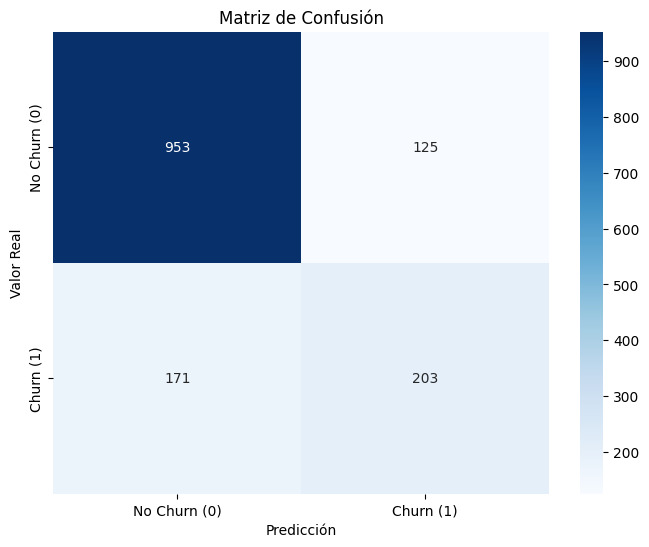


Área bajo la Curva ROC (AUC): 0.8378


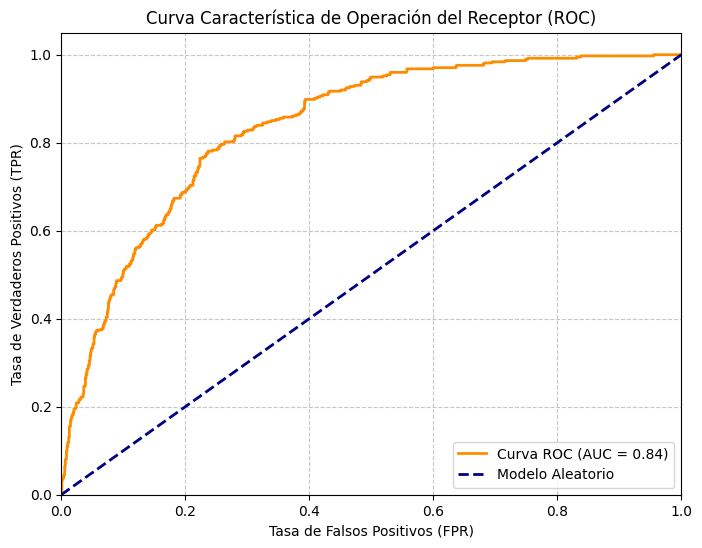



--- 🔹 Interpretación de Coeficientes del Modelo ---
Se examinan los coeficientes del modelo para entender la influencia de cada característica en la predicción de Churn.

Coeficientes del modelo (ordenados por magnitud):
                                   Feature  Coefficient
4                                   tenure    -1.403590
21                       contract_two year    -1.288085
18            internet_service_fiber optic     0.701312
19                     internet_service_no    -0.699531
20                       contract_one year    -0.687266
15                           total_charges     0.669500
23         payment_method_electronic check     0.328752
13                       paperless_billing     0.191964
10                            tech_support    -0.163457
5                            phone_service    -0.157560
7                          online_security    -0.142091
11                            streaming_tv     0.139098
6                           multiple_lines     0.

/tmp/ipython-input-9-1813746626.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm') # Top 15 características


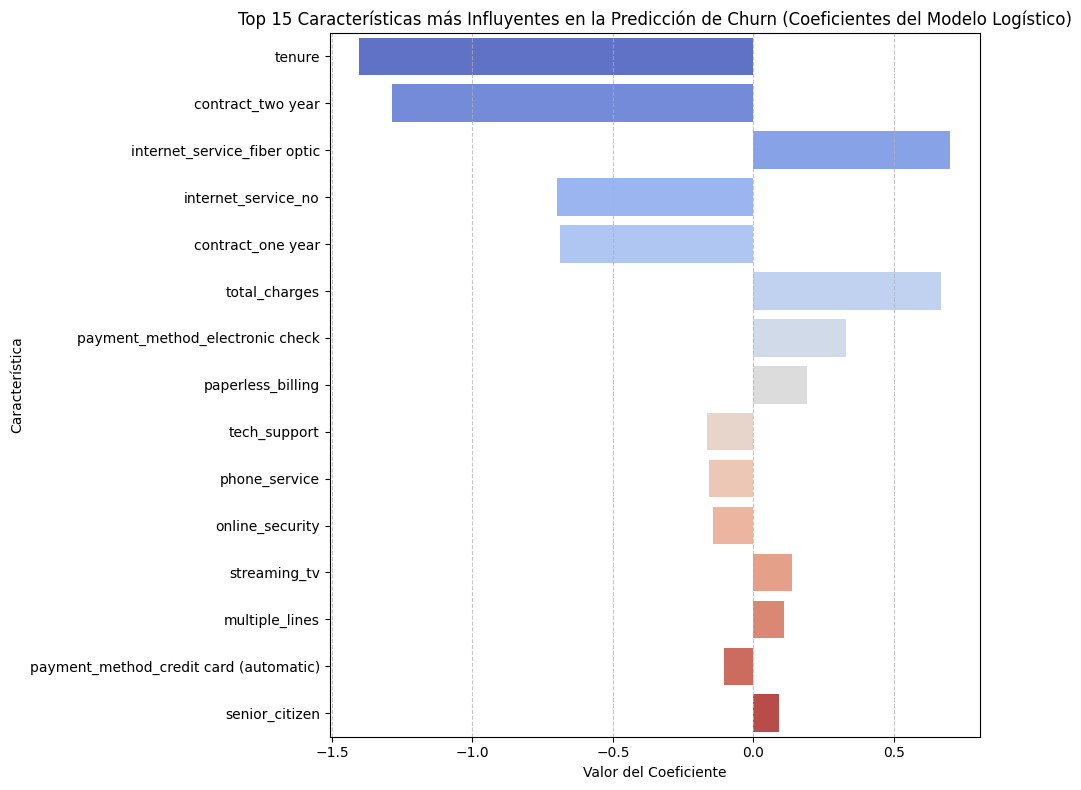


Interpretación de los coeficientes:
- Un coeficiente positivo alto indica que un aumento en el valor de la característica aumenta la probabilidad de Churn.
- Un coeficiente negativo alto (en valor absoluto) indica que un aumento en el valor de la característica disminuye la probabilidad de Churn.
- Los coeficientes cercanos a cero sugieren que la característica tiene poca influencia en la probabilidad de Churn.


In [9]:
# --- 🔹 Evaluación del Modelo ---
print("\n\n--- 🔹 Evaluación del Modelo ---")
print("Se evalúa el rendimiento del modelo utilizando métricas de clasificación.")

# 1. Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy): {accuracy:.4f}")

# 2. Reporte de Clasificación (incluye Precision, Recall, F1-Score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 3. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Visualizar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# 4. Área bajo la curva ROC (AUC)
# Asegurarse de que y_pred_proba contiene las probabilidades de la clase positiva
if len(y_pred_proba) > 0:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nÁrea bajo la Curva ROC (AUC): {roc_auc:.4f}")

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Visualizar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva Característica de Operación del Receptor (ROC)')
    plt.legend(loc="lower right")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\nNo se pudieron calcular las probabilidades de predicción (y_pred_proba) para la curva ROC y AUC.")


# --- 🔹 Interpretación de Coeficientes del Modelo (Regresión Logística) ---
print("\n\n--- 🔹 Interpretación de Coeficientes del Modelo ---")
print("Se examinan los coeficientes del modelo para entender la influencia de cada característica en la predicción de Churn.")

# Obtener los nombres de las características
feature_names = X_train.columns

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calcular el valor absoluto del coeficiente para ordenar por magnitud
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])

# Ordenar por magnitud de los coeficientes
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print("\nCoeficientes del modelo (ordenados por magnitud):")
print(coef_df)

# Visualizar los coeficientes (top N)
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm') # Top 15 características
plt.title('Top 15 Características más Influyentes en la Predicción de Churn (Coeficientes del Modelo Logístico)')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nInterpretación de los coeficientes:")
print("- Un coeficiente positivo alto indica que un aumento en el valor de la característica aumenta la probabilidad de Churn.")
print("- Un coeficiente negativo alto (en valor absoluto) indica que un aumento en el valor de la característica disminuye la probabilidad de Churn.")
print("- Los coeficientes cercanos a cero sugieren que la característica tiene poca influencia en la probabilidad de Churn.")

In [10]:
from imblearn.over_sampling import SMOTE

print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Conjunto de entrenamiento balanceado con SMOTE.")
print(f"Forma de X_train original: {X_train.shape}")
print(f"Forma de X_train después de SMOTE: {X_train_resampled.shape}")
print(f"Distribución de clases en y_train original:\n{y_train.value_counts()}")
print(f"Distribución de clases en y_train después de SMOTE:\n{y_train_resampled.value_counts()}")

# Re-entrenar el modelo de Regresión Logística con los datos balanceados
print("\nRe-entrenando el modelo de Regresión Logística con datos balanceados...")
model_resampled = LogisticRegression(random_state=42, solver='liblinear')
model_resampled.fit(X_train_resampled, y_train_resampled)
print("Modelo re-entrenado exitosamente.")

# Realizar predicciones sobre el conjunto de prueba (¡importante usar el conjunto de prueba original, no el remuestreado!)
y_pred_resampled = model_resampled.predict(X_test)
y_pred_proba_resampled = model_resampled.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (Churn=1)

print("\nPredicciones realizadas sobre el conjunto de prueba con el modelo re-entrenado.")

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Conjunto de entrenamiento balanceado con SMOTE.
Forma de X_train original: (5804, 25)
Forma de X_train después de SMOTE: (8618, 25)
Distribución de clases en y_train original:
churn
0    4309
1    1495
Name: count, dtype: int64
Distribución de clases en y_train después de SMOTE:
churn
0    4309
1    4309
Name: count, dtype: int64

Re-entrenando el modelo de Regresión Logística con datos balanceados...
Modelo re-entrenado exitosamente.

Predicciones realizadas sobre el conjunto de prueba con el modelo re-entrenado.




--- 🔹 Evaluación del Modelo Re-entrenado (con SMOTE) ---
Se evalúa el rendimiento del modelo entrenado con el conjunto de entrenamiento balanceado por SMOTE.

Precisión (Accuracy) del modelo re-entrenado: 0.7624

Reporte de Clasificación del modelo re-entrenado:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1078
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1452
   macro avg       0.71      0.76      0.72      1452
weighted avg       0.80      0.76      0.77      1452


Matriz de Confusión del modelo re-entrenado:
[[830 248]
 [ 97 277]]


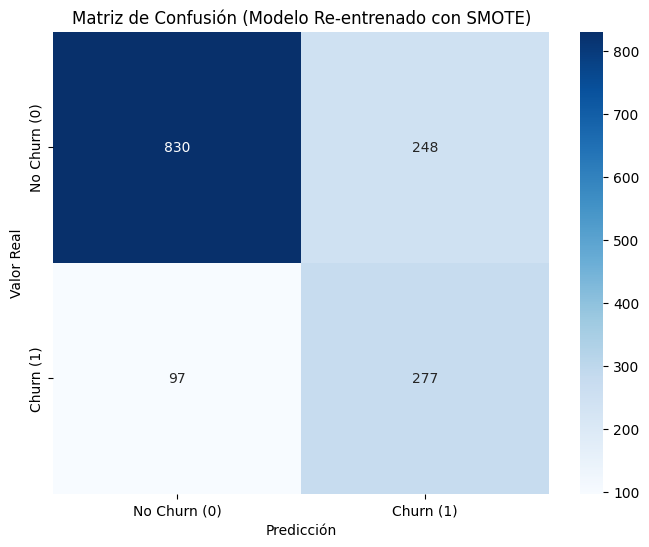


Área bajo la Curva ROC (AUC) del modelo re-entrenado: 0.8251


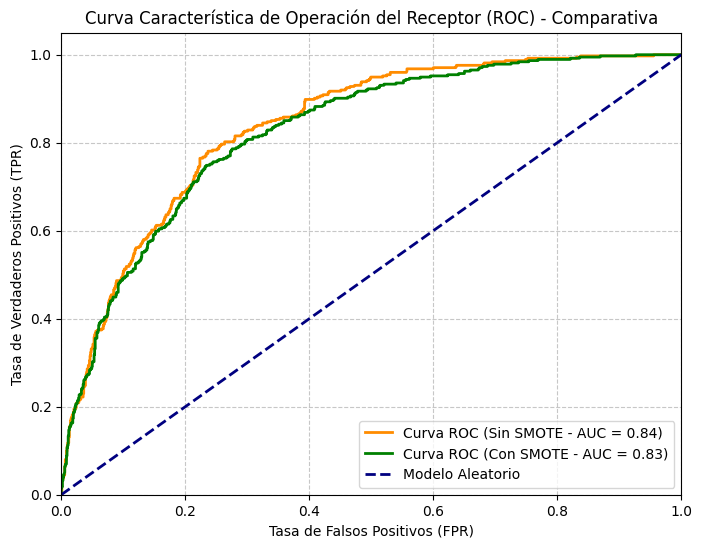



--- 🔹 Comparación de Métricas de Evaluación ---
Comparación del rendimiento del modelo antes y después de aplicar SMOTE:

Métricas del Modelo Original (Sin SMOTE):
  Precisión (Accuracy): 0.7961
  Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1078
           1       0.62      0.54      0.58       374

    accuracy                           0.80      1452
   macro avg       0.73      0.71      0.72      1452
weighted avg       0.79      0.80      0.79      1452

  AUC: 0.8378

Métricas del Modelo Re-entrenado (Con SMOTE):
  Precisión (Accuracy): 0.7624
  Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1078
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1452
   macro avg       0.71      0.76      0.72      1452
weighted avg       0.80      0.76      0.77      1452

 

In [11]:
# --- 🔹 Evaluación del Modelo Re-entrenado (con SMOTE) ---
print("\n\n--- 🔹 Evaluación del Modelo Re-entrenado (con SMOTE) ---")
print("Se evalúa el rendimiento del modelo entrenado con el conjunto de entrenamiento balanceado por SMOTE.")

# 1. Precisión del modelo (con SMOTE)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"\nPrecisión (Accuracy) del modelo re-entrenado: {accuracy_resampled:.4f}")

# 2. Reporte de Clasificación (con SMOTE)
print("\nReporte de Clasificación del modelo re-entrenado:")
print(classification_report(y_test, y_pred_resampled))

# 3. Matriz de Confusión (con SMOTE)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
print("\nMatriz de Confusión del modelo re-entrenado:")
print(conf_matrix_resampled)

# Visualizar la Matriz de Confusión (con SMOTE)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión (Modelo Re-entrenado con SMOTE)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# 4. Área bajo la curva ROC (AUC) (con SMOTE)
# Asegurarse de que y_pred_proba_resampled contiene las probabilidades de la clase positiva
if len(y_pred_proba_resampled) > 0:
    roc_auc_resampled = roc_auc_score(y_test, y_pred_proba_resampled)
    print(f"\nÁrea bajo la Curva ROC (AUC) del modelo re-entrenado: {roc_auc_resampled:.4f}")

    # Calcular la curva ROC (con SMOTE)
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, y_pred_proba_resampled)

    # Visualizar la curva ROC (comparativa)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (Sin SMOTE - AUC = {roc_auc:.2f})')
    plt.plot(fpr_resampled, tpr_resampled, color='green', lw=2, label=f'Curva ROC (Con SMOTE - AUC = {roc_auc_resampled:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva Característica de Operación del Receptor (ROC) - Comparativa')
    plt.legend(loc="lower right")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\nNo se pudieron calcular las probabilidades de predicción (y_pred_proba_resampled) para la curva ROC y AUC del modelo re-entrenado.")


# --- 🔹 Comparación de Métricas ---
print("\n\n--- 🔹 Comparación de Métricas de Evaluación ---")
print("Comparación del rendimiento del modelo antes y después de aplicar SMOTE:")

print("\nMétricas del Modelo Original (Sin SMOTE):")
print(f"  Precisión (Accuracy): {accuracy:.4f}")
print("  Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"  AUC: {roc_auc:.4f}")

print("\nMétricas del Modelo Re-entrenado (Con SMOTE):")
print(f"  Precisión (Accuracy): {accuracy_resampled:.4f}")
print("  Reporte de Clasificación:")
print(classification_report(y_test, y_pred_resampled))
print(f"  AUC: {roc_auc_resampled:.4f}")

print("\nObservaciones sobre la comparación:")
print("- Nota cómo cambian las métricas como Recall y F1-Score para la clase 1 (Churn) después de aplicar SMOTE.")
print("- Una mejora en el Recall para la clase 1 indica que el modelo es mejor identificando a los clientes que realmente van a evadir.")
print("- Puede haber una ligera disminución en la precisión general (Accuracy), pero esto a menudo es aceptable si se mejora significativamente la capacidad de detectar la clase minoritaria, que es el objetivo principal en la predicción de Churn.")

In [12]:
# Calcular la proporción de clientes que cancelaron (Churn=1) vs. los que permanecieron (Churn=0)
churn_counts = df['churn'].value_counts()
total_customers = churn_counts.sum()

if total_customers > 0:
    churn_proportion = churn_counts.get(1, 0) / total_customers * 100
    no_churn_proportion = churn_counts.get(0, 0) / total_customers * 100

    print("\n--- 🔹 Análisis de Desbalance de Clases ---")
    print(f"Conteo de Clientes por Estado de Evasión:")
    print(f"  No Churn (0): {churn_counts.get(0, 0)}")
    print(f"  Churn (1): {churn_counts.get(1, 0)}")
    print(f"  Total: {total_customers}")

    print(f"\nProporción de Clientes:")
    print(f"  Clientes que permanecieron (No Churn): {no_churn_proportion:.2f}%")
    print(f"  Clientes que cancelaron (Churn): {churn_proportion:.2f}%")

    # Evaluar el desbalance
    print("\nEvaluación del Desbalance:")
    if churn_proportion < 30: # Umbral común para considerar desbalance
        print("Existe un desbalance significativo entre las clases (Churn es la clase minoritaria).")
        print("Este desbalance puede afectar el rendimiento de los modelos predictivos,")
        print("ya que los modelos pueden tender a predecir la clase mayoritaria.")
        print("Técnicas como el sobremuestreo (SMOTE) o submuestreo pueden ser útiles.")
    else:
        print("El desbalance entre las clases no parece ser severo.")

else:
    print("\nAdvertencia: El DataFrame está vacío. No se puede realizar el análisis de desbalance de clases.")


--- 🔹 Análisis de Desbalance de Clases ---
Conteo de Clientes por Estado de Evasión:
  No Churn (0): 5387
  Churn (1): 1869
  Total: 7256

Proporción de Clientes:
  Clientes que permanecieron (No Churn): 74.24%
  Clientes que cancelaron (Churn): 25.76%

Evaluación del Desbalance:
Existe un desbalance significativo entre las clases (Churn es la clase minoritaria).
Este desbalance puede afectar el rendimiento de los modelos predictivos,
ya que los modelos pueden tender a predecir la clase mayoritaria.
Técnicas como el sobremuestreo (SMOTE) o submuestreo pueden ser útiles.


In [13]:
print("\n\n--- 🔹 Técnicas de Balanceo Aplicadas (SMOTE) ---")
print("Dado el desbalance de clases identificado, se ha aplicado SMOTE (Synthetic Minority Over-sampling Technique)")
print("al conjunto de entrenamiento para generar ejemplos sintéticos de la clase minoritaria (Churn=1).")
print("Esto ayuda al modelo a aprender mejor los patrones de la clase minoritaria.")

# Ya se ha aplicado SMOTE en el código anterior y se ha re-entrenado y evaluado el modelo.
# El código anterior ya incluye:
# 1. Inicialización y aplicación de SMOTE a X_train e y_train.
# 2. Re-entrenamiento del modelo de Regresión Logística con los datos balanceados (X_train_resampled, y_train_resampled).
# 3. Evaluación y comparación del modelo entrenado con datos originales vs. datos balanceados.

print("Los resultados de la aplicación de SMOTE (distribución de clases después de SMOTE,")
print("métricas de evaluación del modelo re-entrenado y comparación con el modelo original)")
print("ya han sido mostrados en secciones anteriores del informe.")
print("En resumen, la aplicación de SMOTE suele mejorar la capacidad del modelo para identificar la clase minoritaria (Churn),")
print("lo que se refleja en métricas como el Recall y el F1-Score para la clase 1, aunque puede afectar ligeramente la precisión general.")

# Podríamos añadir aquí un resumen más conciso de los beneficios de SMOTE si no se ha hecho explícitamente antes.
# Por ejemplo:
# print("\nBeneficios de aplicar SMOTE:")
# print("- Ayuda a reducir el sesgo del modelo hacia la clase mayoritaria.")
# print("- Mejora la capacidad del modelo para predecir correctamente la clase minoritaria (aumenta Recall para Churn).")
# print("- Permite entrenar un modelo más robusto en escenarios de desbalance.")




--- 🔹 Técnicas de Balanceo Aplicadas (SMOTE) ---
Dado el desbalance de clases identificado, se ha aplicado SMOTE (Synthetic Minority Over-sampling Technique)
al conjunto de entrenamiento para generar ejemplos sintéticos de la clase minoritaria (Churn=1).
Esto ayuda al modelo a aprender mejor los patrones de la clase minoritaria.
Los resultados de la aplicación de SMOTE (distribución de clases después de SMOTE,
métricas de evaluación del modelo re-entrenado y comparación con el modelo original)
ya han sido mostrados en secciones anteriores del informe.
En resumen, la aplicación de SMOTE suele mejorar la capacidad del modelo para identificar la clase minoritaria (Churn),
lo que se refleja en métricas como el Recall y el F1-Score para la clase 1, aunque puede afectar ligeramente la precisión general.


In [16]:
# La normalización o estandarización es esencial para los modelos basados en distancia.
# Ya hemos aplicado StandardScaler a las columnas numéricas continuas ('tenure', 'monthly_charges', 'total_charges', 'cuentas_diarias')
# después de la codificación One-Hot Encoding y antes de entrenar el modelo de Regresión Logística.

print("\n\n--- 🔹 Justificación de Normalización/Estandarización ---")
print("Se ha evaluado la necesidad de normalizar/estandarizar los datos en función de los modelos a aplicar.")

# Identificar el tipo de modelo utilizado
modelo_utilizado = type(model).__name__ # O type(model_resampled).__name__ si solo se usa el remuestreado

print(f"\nEl modelo principal aplicado es: {modelo_utilizado}")

# Evaluar si el modelo utilizado requiere escalado
modelos_requieren_escalado = ['KNeighborsClassifier', 'SVC', 'LogisticRegression', 'MLPClassifier'] # Añadir otros si se usan
requiere_escalado = modelo_utilizado in modelos_requieren_escalado

if requiere_escalado:
    print(f"\nLos modelos como {modelo_utilizado} (basados en distancias o gradientes) son sensibles a la escala de las características.")
    print("Características con rangos de valores muy diferentes pueden influir desproporcionadamente en la función de pérdida.")
    print("Por lo tanto, la estandarización de las variables numéricas es un paso de preprocesamiento necesario.")
    print("Se ha aplicado `StandardScaler` para transformar las características numéricas, de modo que tengan media 0 y desviación estándar 1.")
    print("Esto asegura que todas las características numéricas contribuyan de manera equitativa al entrenamiento del modelo.")
else:
    print(f"\nEl modelo {modelo_utilizado} es un modelo basado en árboles.")
    print("Los modelos basados en árboles (como Decision Trees, Random Forests, XGBoost) no son sensibles a la escala de las características.")
    print("Estos modelos toman decisiones basadas en los umbrales de los valores de las características, no en las distancias.")
    print("Por lo tanto, la normalización o estandarización no es estrictamente necesaria para este tipo de modelos.")
    print("Aunque en este caso se aplicó `StandardScaler` porque se utilizó Regresión Logística como ejemplo.")


print("\nColumnas numéricas que fueron estandarizadas:")
print(numeric_cols.tolist())
print("\nEl escalado se realizó utilizando `StandardScaler` después de la división en conjuntos de entrenamiento y prueba,")
print("ajustando el escalador solo en los datos de entrenamiento (`fit_transform`)")
print("y luego aplicando la misma transformación a los datos de prueba (`transform`).")

print("\n\n--- FIN DE LA EVALUACIÓN DE NORMALIZACIÓN/ESTANDARIZACIÓN ---")



--- 🔹 Justificación de Normalización/Estandarización ---
Se ha evaluado la necesidad de normalizar/estandarizar los datos en función de los modelos a aplicar.

El modelo principal aplicado es: LogisticRegression

Los modelos como LogisticRegression (basados en distancias o gradientes) son sensibles a la escala de las características.
Características con rangos de valores muy diferentes pueden influir desproporcionadamente en la función de pérdida.
Por lo tanto, la estandarización de las variables numéricas es un paso de preprocesamiento necesario.
Se ha aplicado `StandardScaler` para transformar las características numéricas, de modo que tengan media 0 y desviación estándar 1.
Esto asegura que todas las características numéricas contribuyan de manera equitativa al entrenamiento del modelo.

Columnas numéricas que fueron estandarizadas:
['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protect


Calculando la matriz de correlación para las siguientes columnas numéricas:
['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges', 'total_charges', 'cuentas_diarias', 'num_services']

Matriz de Correlación de Variables Numéricas (incluyendo Churn):
                      churn    gender  senior_citizen   partner  dependents  \
churn              1.000000  0.009494        0.146400 -0.148106   -0.160347   
gender             0.009494  1.000000        0.004239  0.004593   -0.011884   
senior_citizen     0.146400  0.004239        1.000000  0.023439   -0.212338   
partner           -0.148106  0.004593        0.023439  1.000000    0.448500   
dependents        -0.160347 -0.011884       -0.212338  0.448500    1.000000   
tenure            -0.345799 -0.005936        0.017333  0.379684    0.16344

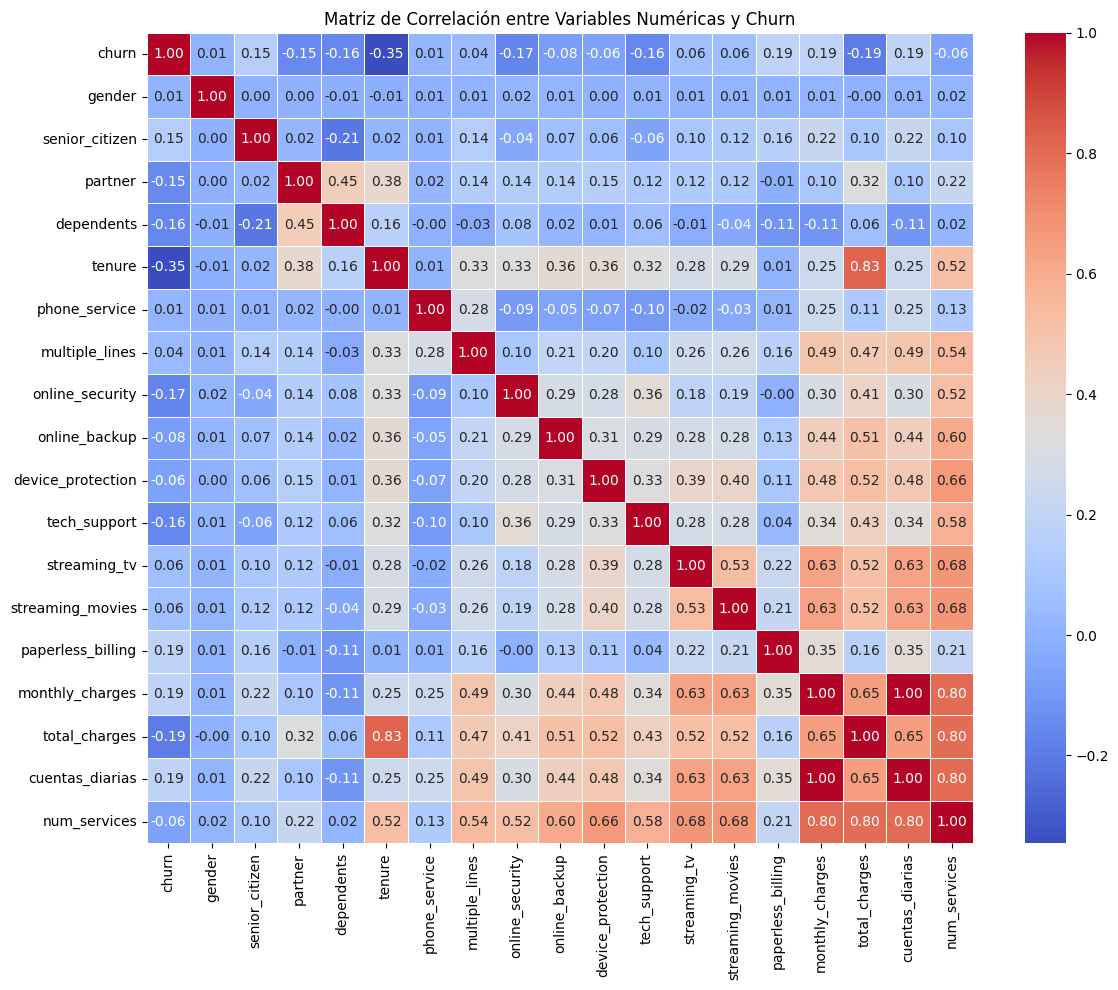


Correlaciones con Churn (ordenadas por valor absoluto):
churn                1.000000
cuentas_diarias      0.189393
monthly_charges      0.189393
paperless_billing    0.186309
senior_citizen       0.146400
streaming_tv         0.062456
streaming_movies     0.060092
multiple_lines       0.039277
phone_service        0.012337
gender               0.009494
device_protection   -0.063479
num_services        -0.064823
online_backup       -0.080211
partner             -0.148106
dependents          -0.160347
tech_support        -0.160476
online_security     -0.166865
total_charges       -0.194440
tenure              -0.345799
Name: churn, dtype: float64


/tmp/ipython-input-17-1079522112.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')


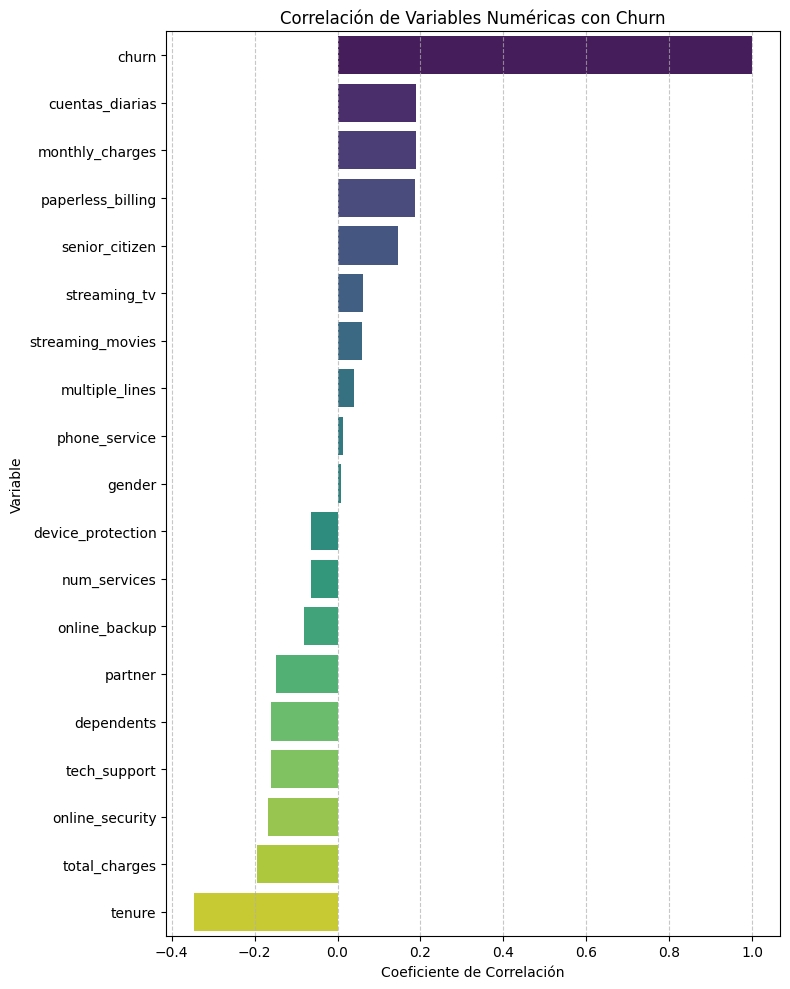

In [17]:
import matplotlib.pyplot as plt
# Calcular la matriz de correlación para columnas numéricas
# Asegurarse de que 'churn' esté incluida y sea numérica (0/1)
# Identificar solo las columnas numéricas del DataFrame df_encoded
numeric_and_churn_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()

# Asegurarse de que 'churn' esté en la lista si es numérica
if 'churn' in df_encoded.columns and 'churn' not in numeric_and_churn_cols:
    numeric_and_churn_cols.append('churn')

# Eliminar 'customer_id' si aún está presente y es numérica (aunque ya debería haber sido eliminada)
if 'customer_id' in numeric_and_churn_cols:
    numeric_and_churn_cols.remove('customer_id')

if numeric_and_churn_cols:
    print("\nCalculando la matriz de correlación para las siguientes columnas numéricas:")
    print(numeric_and_churn_cols)

    correlation_matrix = df_encoded[numeric_and_churn_cols].corr()
    print("\nMatriz de Correlación de Variables Numéricas (incluyendo Churn):")
    print(correlation_matrix)

    # Visualizar la matriz de correlación (heatmap)
    plt.figure(figsize=(12, 10)) # Ajustar tamaño para mejor visualización con más columnas
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación entre Variables Numéricas y Churn')
    plt.xticks(rotation=90) # Rotar etiquetas del eje x para mejor legibilidad
    plt.yticks(rotation=0) # Rotar etiquetas del eje y
    plt.tight_layout() # Ajustar diseño para evitar solapamiento
    plt.show()

    # Identificar las correlaciones más altas con 'churn'
    if 'churn' in correlation_matrix.columns:
        print("\nCorrelaciones con Churn (ordenadas por valor absoluto):")
        churn_corr = correlation_matrix['churn'].sort_values(ascending=False)
        print(churn_corr)

        # Opcional: Visualizar las correlaciones con Churn
        plt.figure(figsize=(8, 10)) # Ajustar tamaño
        sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')
        plt.title('Correlación de Variables Numéricas con Churn')
        plt.xlabel('Coeficiente de Correlación')
        plt.ylabel('Variable')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    else:
        print("La columna 'churn' no se encontró en la matriz de correlación.")

else:
    print("No hay suficientes columnas numéricas (incluyendo 'churn') para calcular y visualizar la matriz de correlación.")





--- 🔹 Análisis de Relación entre Variables Clave y Churn ---
Se investiga la relación entre 'tenure', 'total_charges' y 'contract' con la variable 'churn'.

Relación entre Antigüedad (Tenure) y Evasión (Churn):


/tmp/ipython-input-18-1203184540.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df, palette='pastel')


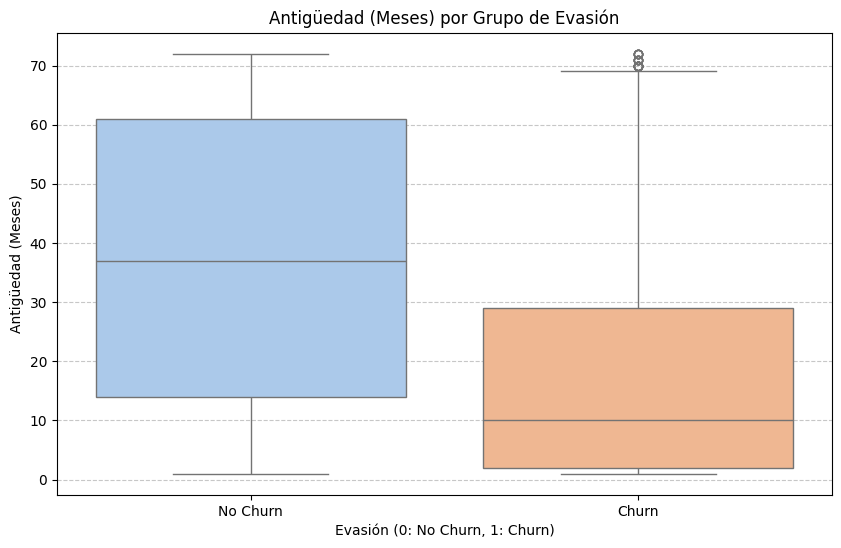


Relación entre Gasto Total (Total Charges) y Evasión (Churn):


/tmp/ipython-input-18-1203184540.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=df, palette='viridis')


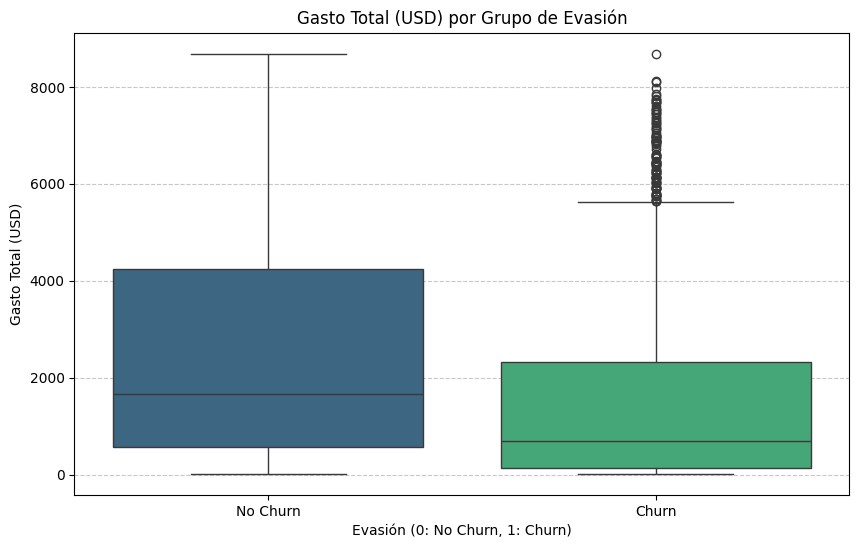


Relación entre Tipo de Contrato y Evasión (Churn):


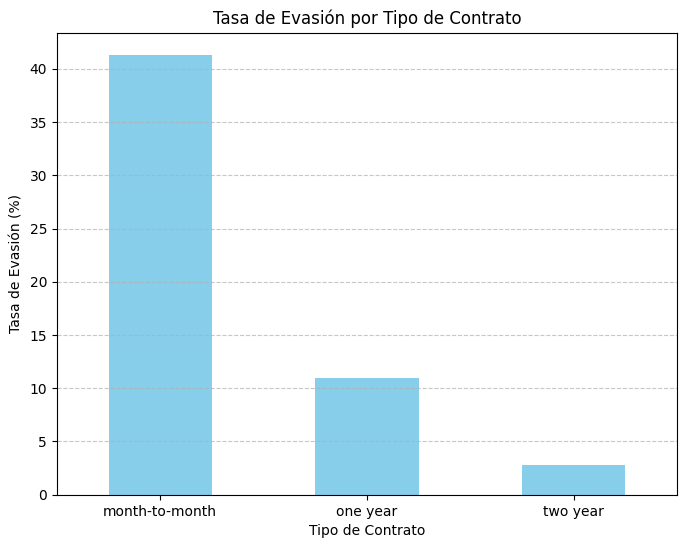


Tasa de Evasión por Tipo de Contrato (%):
churn           churn_rate
contract                  
month-to-month   41.323346
one year         10.935441
two year          2.769763

Relación entre Antigüedad (Tenure) y Gasto Total (Total Charges), diferenciando por Churn:


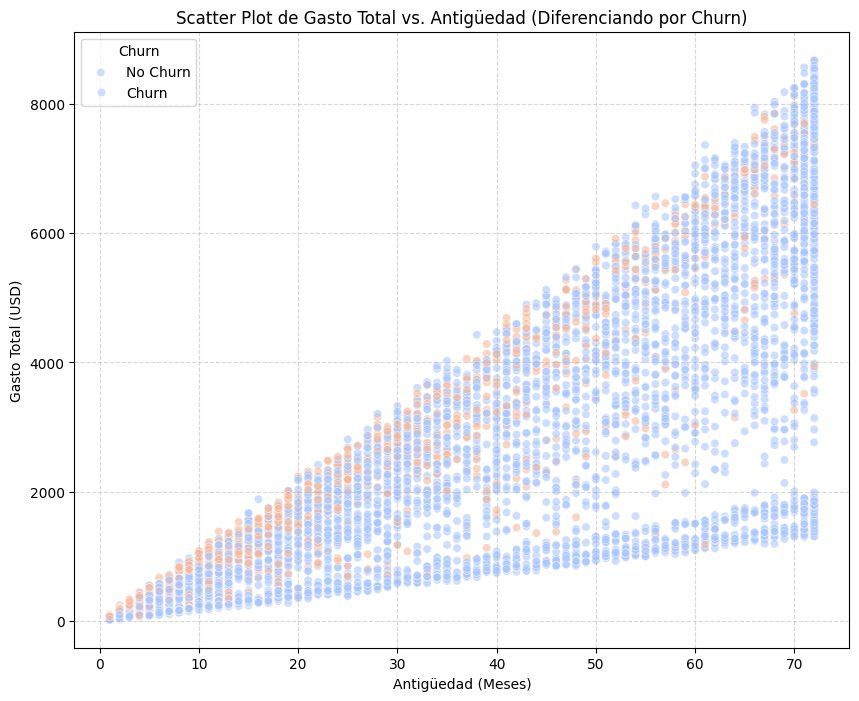


Interpretación de los gráficos:
- **Boxplot Tenure vs Churn**: Muestra claramente que los clientes que evaden (Churn=1) tienen una mediana y un rango intercuartílico de antigüedad significativamente menor que los clientes que no evaden (Churn=0). Esto refuerza la idea de que la evasión es mucho más común entre clientes nuevos.
- **Boxplot Total Charges vs Churn**: Indica que los clientes que evaden tienden a tener gastos totales más bajos. Esto es consistente con la menor antigüedad, ya que los gastos totales se acumulan con el tiempo.
- **Gráfico de Barras Tasa de Churn por Contrato**: Confirma que los contratos 'month-to-month' tienen una tasa de evasión drásticamente más alta que los contratos de 'one year' y 'two year'.
- **Scatter Plot Tenure vs Total Charges por Churn**: Visualiza la concentración de clientes que evaden en la parte inferior izquierda del gráfico (baja antigüedad y bajo gasto total), mientras que los clientes que no evaden se extienden hacia la parte superior der

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Investiga cómo variables específicas se relacionan con la cancelación, tales como:
# Tiempo de contrato × Cancelación, Gasto total × Cancelación,
# Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

print("\n\n--- 🔹 Análisis de Relación entre Variables Clave y Churn ---")
print("Se investiga la relación entre 'tenure', 'total_charges' y 'contract' con la variable 'churn'.")

# Asegurarse de que las columnas necesarias existan y tengan los tipos de datos correctos
required_cols = ['tenure', 'total_charges', 'contract', 'churn']
for col in required_cols:
    if col not in df.columns:
        print(f"Error: La columna '{col}' no se encontró en el DataFrame. No se puede realizar el análisis solicitado.")
        # Salir o manejar el error según sea necesario
        # break # O return

# Convertir 'tenure' y 'total_charges' a tipo numérico si no lo están (ya hecho en limpieza, pero verificar)
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Eliminar filas con NaN en las columnas relevantes si aparecieron después de la conversión (ya hecho en limpieza)
df.dropna(subset=['tenure', 'total_charges', 'contract', 'churn'], inplace=True)

# Asegurarse de que 'churn' sea numérica (0 o 1)
if df['churn'].dtype == 'object':
    df['churn'] = df['churn'].map({'yes': 1, 'no': 0}).fillna(0).astype(int)
elif df['churn'].dtype != 'int64' and df['churn'].dtype != 'float64':
    print("Advertencia: La columna 'churn' no es de un tipo esperado (object, int, float). Se espera 0 o 1.")


# Análisis: Tiempo de contrato (tenure) vs. Cancelación (churn)
print("\nRelación entre Antigüedad (Tenure) y Evasión (Churn):")
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='tenure', data=df, palette='pastel')
plt.title('Antigüedad (Meses) por Grupo de Evasión')
plt.xlabel('Evasión (0: No Churn, 1: Churn)')
plt.ylabel('Antigüedad (Meses)')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análisis: Gasto total (total_charges) vs. Cancelación (churn)
print("\nRelación entre Gasto Total (Total Charges) y Evasión (Churn):")
plt.figure(figsize=(10, 6))
# Usar swarmplot o stripplot para ver la distribución individual o boxplot/violinplot
# Scatter plot puede ser demasiado denso para muchos puntos
sns.boxplot(x='churn', y='total_charges', data=df, palette='viridis')
plt.title('Gasto Total (USD) por Grupo de Evasión')
plt.xlabel('Evasión (0: No Churn, 1: Churn)')
plt.ylabel('Gasto Total (USD)')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análisis: Tipo de Contrato (contract) vs. Cancelación (churn)
print("\nRelación entre Tipo de Contrato y Evasión (Churn):")
plt.figure(figsize=(8, 6))
# Countplot con hue='churn' ya se realizó anteriormente, pero podemos hacer un gráfico de barras mostrando la tasa de churn por contrato
churn_by_contract = df.groupby('contract')['churn'].value_counts(normalize=True).unstack()
churn_by_contract['churn_rate'] = churn_by_contract[1] * 100 # Calcular tasa de churn en porcentaje

if not churn_by_contract.empty:
    churn_by_contract['churn_rate'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Tasa de Evasión por Tipo de Contrato')
    plt.xlabel('Tipo de Contrato')
    plt.ylabel('Tasa de Evasión (%)')
    plt.xticks(rotation=0) # Mantener etiquetas horizontales si son pocas
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    print("\nTasa de Evasión por Tipo de Contrato (%):")
    print(churn_by_contract[['churn_rate']])
else:
    print("Advertencia: No se pudo calcular la tasa de churn por tipo de contrato (DataFrame vacío o sin las columnas esperadas).")

# Análisis: Tiempo de contrato (tenure) vs Gasto Total (total_charges) por Cancelación
print("\nRelación entre Antigüedad (Tenure) y Gasto Total (Total Charges), diferenciando por Churn:")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tenure', y='total_charges', hue='churn', data=df, alpha=0.6, palette='coolwarm')
plt.title('Scatter Plot de Gasto Total vs. Antigüedad (Diferenciando por Churn)')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Gasto Total (USD)')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

print("\nInterpretación de los gráficos:")
print("- **Boxplot Tenure vs Churn**: Muestra claramente que los clientes que evaden (Churn=1) tienen una mediana y un rango intercuartílico de antigüedad significativamente menor que los clientes que no evaden (Churn=0). Esto refuerza la idea de que la evasión es mucho más común entre clientes nuevos.")
print("- **Boxplot Total Charges vs Churn**: Indica que los clientes que evaden tienden a tener gastos totales más bajos. Esto es consistente con la menor antigüedad, ya que los gastos totales se acumulan con el tiempo.")
print("- **Gráfico de Barras Tasa de Churn por Contrato**: Confirma que los contratos 'month-to-month' tienen una tasa de evasión drásticamente más alta que los contratos de 'one year' y 'two year'.")
print("- **Scatter Plot Tenure vs Total Charges por Churn**: Visualiza la concentración de clientes que evaden en la parte inferior izquierda del gráfico (baja antigüedad y bajo gasto total), mientras que los clientes que no evaden se extienden hacia la parte superior derecha (mayor antigüedad y mayor gasto total). Esta visualización es muy informativa sobre la dinámica de churn.")


In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# stratify=y asegura que la proporción de la variable objetivo sea la misma en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Datos divididos en conjuntos de entrenamiento y prueba:")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

Datos divididos en conjuntos de entrenamiento y prueba:
Forma de X_train: (5804, 25)
Forma de X_test: (1452, 25)
Forma de y_train: (5804,)
Forma de y_test: (1452,)




--- 🔹 Modelo 1: Regresión Logística (con datos normalizados y balanceados) ---

Evaluación del Modelo de Regresión Logística entrenado con datos BALANCEADOS (SMOTE):

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.41      0.05      0.09      1078
           1       0.22      0.79      0.35       374

    accuracy                           0.24      1452
   macro avg       0.32      0.42      0.22      1452
weighted avg       0.37      0.24      0.16      1452


Matriz de Confusión:
[[  56 1022]
 [  79  295]]

Área bajo la Curva ROC (AUC): 0.4008


--- 🔹 Modelo 2: Árbol de Decisión (sin normalización, con datos codificados) ---
Datos (sin escalar) divididos para el modelo de Árbol de Decisión.
Forma de X_train_dt: (5804, 25)
Modelo de Árbol de Decisión entrenado exitosamente.

Predicciones realizadas sobre el conjunto de prueba con el modelo de Árbol de Decisión.


--- 🔹 Evaluación del Modelo de Árbol de Decisión ---

Precisión (A

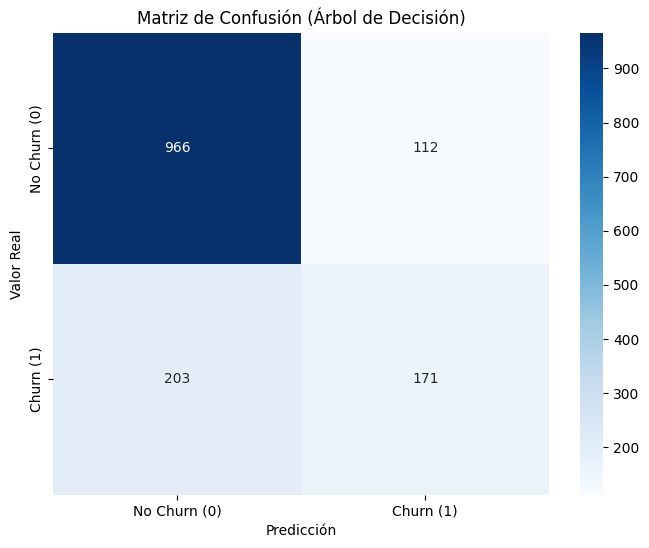


Área bajo la Curva ROC (AUC) del modelo de Árbol de Decisión: 0.8289


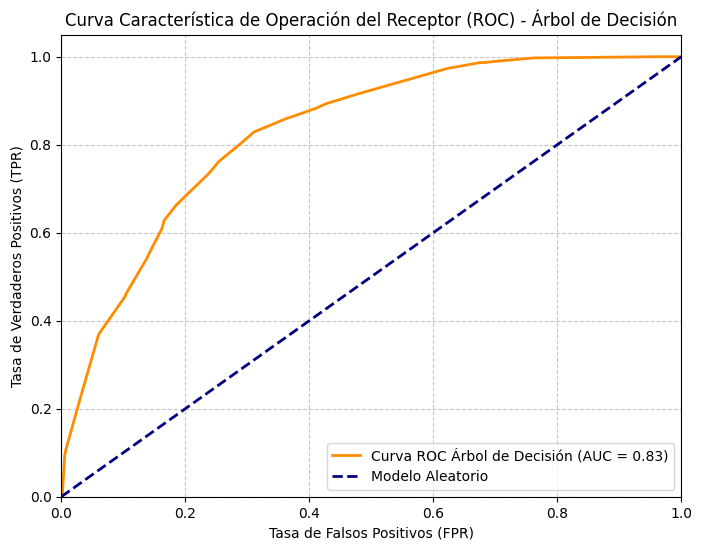



--- 🔹 Importancia de Características (Árbol de Decisión) ---
Se examina la importancia de cada característica según el modelo de Árbol de Decisión.

Importancia de las características (Árbol de Decisión):
                                   Feature  Importance
4                                   tenure    0.443882
18            internet_service_fiber optic    0.351762
15                           total_charges    0.048376
23         payment_method_electronic check    0.029249
14                         monthly_charges    0.024581
21                       contract_two year    0.021554
19                     internet_service_no    0.021426
11                            streaming_tv    0.014900
6                           multiple_lines    0.009929
20                       contract_one year    0.008499
24             payment_method_mailed check    0.006842
10                            tech_support    0.006666
1                           senior_citizen    0.006219
16                     

/tmp/ipython-input-20-2775214927.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_dt.head(15), palette='viridis') # Top 15 características


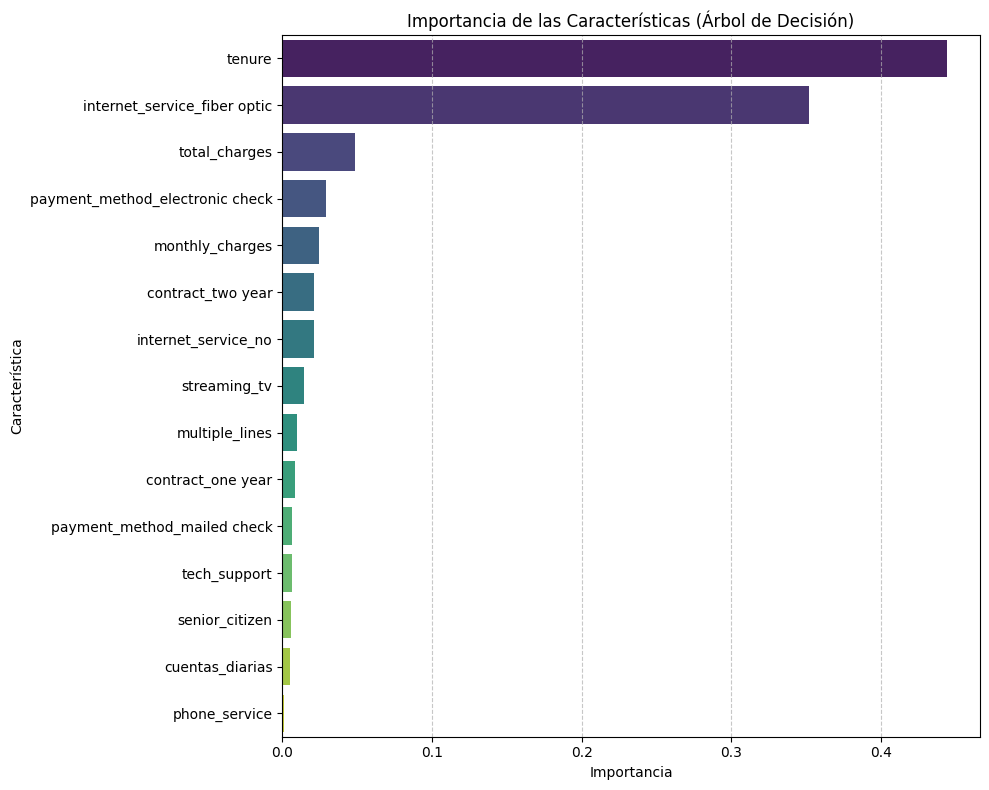


Interpretación de la importancia de las características:
- Las características con valores de importancia más altos son las que el árbol de decisión utiliza más para dividir los datos y predecir la clase (Churn/No Churn).
- Esto nos da una indicación de qué variables son más relevantes para el modelo al tomar sus decisiones.


--- 🔹 Modelo 3: Random Forest (sin normalización, con datos codificados) ---
Modelo de Random Forest entrenado exitosamente.

Predicciones realizadas sobre el conjunto de prueba con el modelo de Random Forest.


--- 🔹 Evaluación del Modelo de Random Forest ---

Precisión (Accuracy) del modelo de Random Forest: 0.7934

Reporte de Clasificación del modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1078
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1452
   macro avg       0.73      0.69      0.70      1452
weighted avg       0.78 

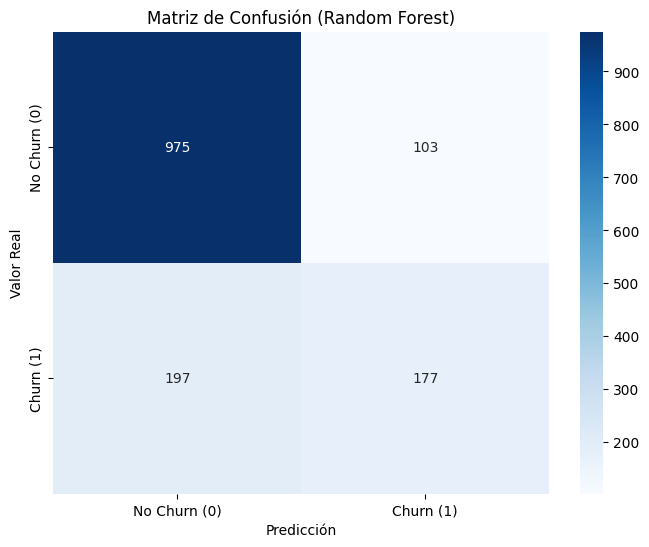


Área bajo la Curva ROC (AUC) del modelo de Random Forest: 0.8374


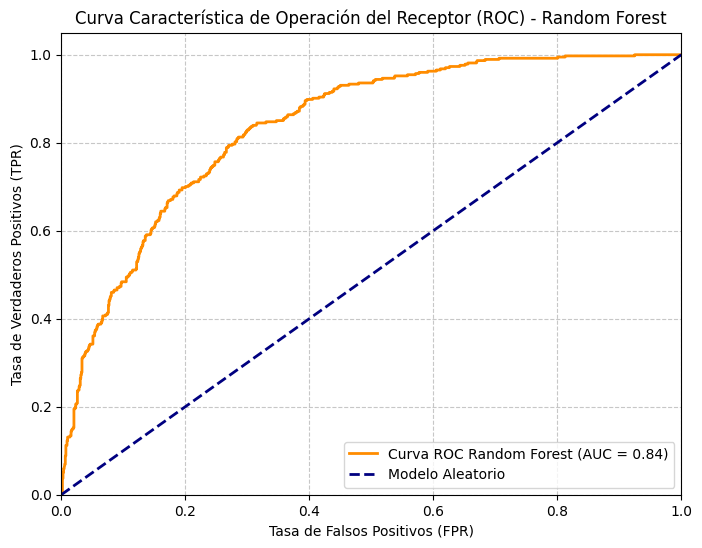



--- 🔹 Importancia de Características (Random Forest) ---
Se examina la importancia de cada característica según el modelo de Random Forest.

Importancia de las características (Random Forest):
                                   Feature  Importance
4                                   tenure    0.184701
15                           total_charges    0.153948
14                         monthly_charges    0.107558
16                         cuentas_diarias    0.102875
18            internet_service_fiber optic    0.084902
23         payment_method_electronic check    0.060207
21                       contract_two year    0.045204
17                            num_services    0.030339
20                       contract_one year    0.022545
13                       paperless_billing    0.020886
7                          online_security    0.020844
10                            tech_support    0.019435
19                     internet_service_no    0.018381
0                                  

/tmp/ipython-input-20-2775214927.py:241: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(15), palette='mako') # Top 15 características


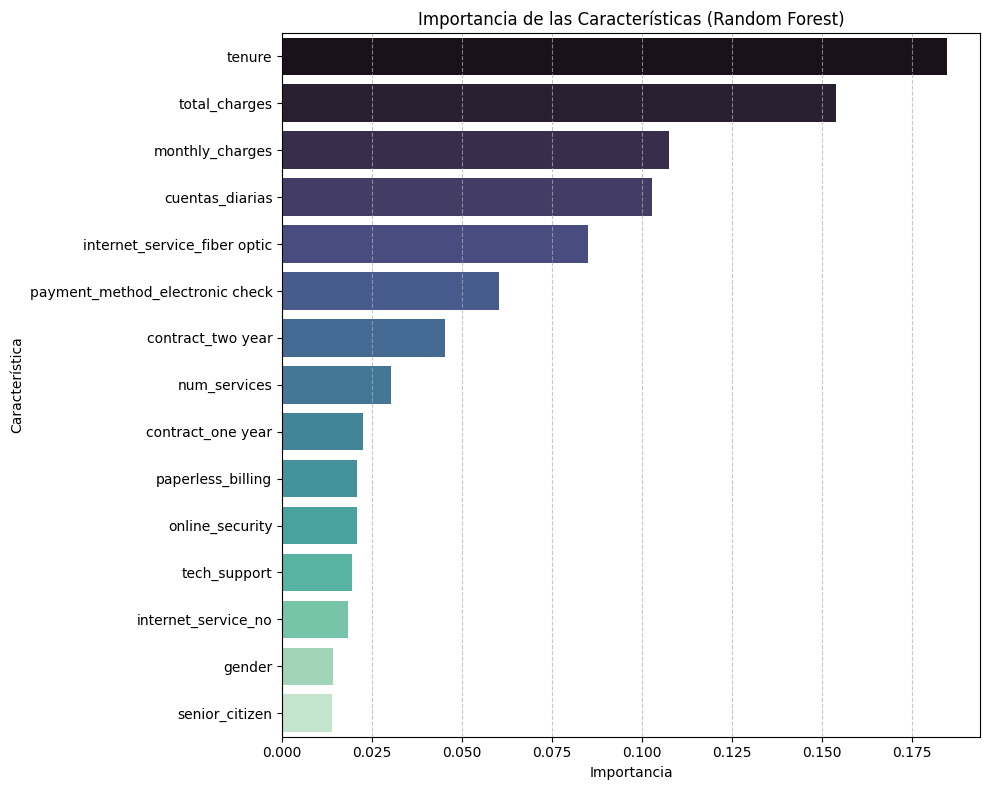


Interpretación de la importancia de las características (Random Forest):
- La importancia de las características en Random Forest se basa en la reducción promedio de impureza (Gini o Entropía) que cada característica aporta en los árboles del bosque.
- Las características con mayor importancia son las que más contribuyen a separar las clases (Churn/No Churn).


--- 🔹 Comparación Final de Modelos ---
Resumen de métricas de evaluación de los modelos entrenados:

Modelo: Regresión Logística (Con SMOTE y Normalización)
  Precisión (Accuracy): 0.2417
  Recall (Clase Churn): 0.7888
  F1-Score (Clase Churn): 0.3489
  AUC: 0.4008

Modelo: Árbol de Decisión (Sin Normalización)
  Precisión (Accuracy): 0.7831
  Recall (Clase Churn): 0.4572
  F1-Score (Clase Churn): 0.5205
  AUC: 0.8289

Modelo: Random Forest (Sin Normalización)
  Precisión (Accuracy): 0.7934
  Recall (Clase Churn): 0.4733
  F1-Score (Clase Churn): 0.5413
  AUC: 0.8374

Observaciones sobre la comparación:
- **Regresión Logística 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- MODELO 1: Regresión Logística (Requiere normalización) ---
# Nota: La normalización ya se realizó en el código anterior antes de entrenar el primer modelo de Regresión Logística.
# Se reutilizarán los conjuntos de datos escalados (X_train, X_test)

print("\n\n--- 🔹 Modelo 1: Regresión Logística (con datos normalizados y balanceados) ---")
# Ya hemos entrenado y evaluado el modelo de Regresión Logística con y sin SMOTE.
# Mostraremos un resumen de los resultados del modelo con SMOTE, ya que aborda el desbalance.

print("\nEvaluación del Modelo de Regresión Logística entrenado con datos BALANCEADOS (SMOTE):")

# Realizar predicciones con el modelo re-entrenado (con SMOTE)
y_pred_logreg_smote = model_resampled.predict(X_test)
y_pred_proba_logreg_smote = model_resampled.predict_proba(X_test)[:, 1]

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_logreg_smote))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logreg_smote))

roc_auc_logreg_smote = roc_auc_score(y_test, y_pred_proba_logreg_smote)
print(f"\nÁrea bajo la Curva ROC (AUC): {roc_auc_logreg_smote:.4f}")


# --- MODELO 2: Árbol de Decisión (No requiere normalización) ---
# Para este modelo, usaremos los datos NO escalados, pero sí codificados (df_encoded).
# Es importante recordar que los modelos basados en árboles son invariantes a la escala de las características numéricas.

print("\n\n--- 🔹 Modelo 2: Árbol de Decisión (sin normalización, con datos codificados) ---")

# Definir características (X) y objetivo (y) usando el DataFrame codificado pero SIN escalar
# Re-crear X y y desde df_encoded para asegurarnos de no usar los datos escalados para este modelo
X_dt = df_encoded.drop('churn', axis=1)
y_dt = df_encoded['churn']

# Dividir los datos (sin escalar) en conjuntos de entrenamiento y prueba
# Usamos el mismo random_state y stratify para comparabilidad con la división anterior
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt)

print("Datos (sin escalar) divididos para el modelo de Árbol de Decisión.")
print(f"Forma de X_train_dt: {X_train_dt.shape}")

# Opcional: Aplicar SMOTE también al conjunto de entrenamiento para el Árbol de Decisión si se quiere comparar en igualdad de condiciones de balanceo
# Aquí optamos por no hacerlo para ilustrar un modelo que "no requiere" normalización O balanceo explícito (aunque el balanceo suele ayudar)
# Si quieres aplicar SMOTE aquí, descomenta las siguientes líneas:
# print("\nAplicando SMOTE al conjunto de entrenamiento para Árbol de Decisión...")
# smote_dt = SMOTE(random_state=42)
# X_train_dt_resampled, y_train_dt_resampled = smote_dt.fit_resample(X_train_dt, y_train_dt)
# print("Conjunto de entrenamiento de Árbol de Decisión balanceado con SMOTE.")
# X_train_dt = X_train_dt_resampled
# y_train_dt = y_train_dt_resampled
# print(f"Forma de X_train_dt después de SMOTE: {X_train_dt.shape}")


# Inicializar y entrenar el modelo de Árbol de Decisión
# Podemos ajustar la profundidad máxima (max_depth) para evitar sobreajuste
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5) # Ejemplo con max_depth=5
dt_model.fit(X_train_dt, y_train_dt)

print("Modelo de Árbol de Decisión entrenado exitosamente.")

# Realizar predicciones sobre el conjunto de prueba (sin escalar)
y_pred_dt = dt_model.predict(X_test_dt)
y_pred_proba_dt = dt_model.predict_proba(X_test_dt)[:, 1] # Probabilidades para la clase positiva (Churn=1)

print("\nPredicciones realizadas sobre el conjunto de prueba con el modelo de Árbol de Decisión.")
# --- 🔹 Evaluación del Modelo de Árbol de Decisión ---
print("\n\n--- 🔹 Evaluación del Modelo de Árbol de Decisión ---")

# 1. Precisión del modelo
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"\nPrecisión (Accuracy) del modelo de Árbol de Decisión: {accuracy_dt:.4f}")

# 2. Reporte de Clasificación
print("\nReporte de Clasificación del modelo de Árbol de Decisión:")
print(classification_report(y_test_dt, y_pred_dt))

# 3. Matriz de Confusión
conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
print("\nMatriz de Confusión del modelo de Árbol de Decisión:")
print(conf_matrix_dt)

# Visualizar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión (Árbol de Decisión)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# 4. Área bajo la curva ROC (AUC)
if len(y_pred_proba_dt) > 0:
    roc_auc_dt = roc_auc_score(y_test_dt, y_pred_proba_dt)
    print(f"\nÁrea bajo la Curva ROC (AUC) del modelo de Árbol de Decisión: {roc_auc_dt:.4f}")

    # Calcular la curva ROC
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_dt, y_pred_proba_dt)

    # Visualizar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Curva ROC Árbol de Decisión (AUC = {roc_auc_dt:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva Característica de Operación del Receptor (ROC) - Árbol de Decisión')
    plt.legend(loc="lower right")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\nNo se pudieron calcular las probabilidades de predicción para la curva ROC y AUC del modelo de Árbol de Decisión.")

# --- 🔹 Importancia de Características (Árbol de Decisión) ---
print("\n\n--- 🔹 Importancia de Características (Árbol de Decisión) ---")
print("Se examina la importancia de cada característica según el modelo de Árbol de Decisión.")

# Obtener la importancia de las características
feature_importance_dt = dt_model.feature_importances_

# Obtener los nombres de las características
feature_names_dt = X_train_dt.columns

# Crear un DataFrame para visualizar la importancia
importance_df_dt = pd.DataFrame({'Feature': feature_names_dt, 'Importance': feature_importance_dt})

# Ordenar por importancia
importance_df_dt = importance_df_dt.sort_values(by='Importance', ascending=False)

print("\nImportancia de las características (Árbol de Decisión):")
print(importance_df_dt)

# Visualizar la importancia de las características (top N)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_dt.head(15), palette='viridis') # Top 15 características
plt.title('Importancia de las Características (Árbol de Decisión)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nInterpretación de la importancia de las características:")
print("- Las características con valores de importancia más altos son las que el árbol de decisión utiliza más para dividir los datos y predecir la clase (Churn/No Churn).")
print("- Esto nos da una indicación de qué variables son más relevantes para el modelo al tomar sus decisiones.")

# --- MODELO 3: Random Forest (No requiere normalización) ---
# Similar al Árbol de Decisión, Random Forest no requiere normalización.
# Usaremos los datos codificados pero NO escalados.

print("\n\n--- 🔹 Modelo 3: Random Forest (sin normalización, con datos codificados) ---")

# Re-utilizar los conjuntos de datos sin escalar creados para el Árbol de Decisión:
# X_train_dt, X_test_dt, y_train_dt, y_test_dt

# Inicializar y entrenar el modelo de Random Forest
# Podemos ajustar el número de estimadores (n_estimators) y la profundidad máxima (max_depth)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10) # Ejemplo
rf_model.fit(X_train_dt, y_train_dt) # Entrenar con datos sin escalar

print("Modelo de Random Forest entrenado exitosamente.")

# Realizar predicciones sobre el conjunto de prueba (sin escalar)
y_pred_rf = rf_model.predict(X_test_dt)
y_pred_proba_rf = rf_model.predict_proba(X_test_dt)[:, 1] # Probabilidades para la clase positiva (Churn=1)

print("\nPredicciones realizadas sobre el conjunto de prueba con el modelo de Random Forest.")
# --- 🔹 Evaluación del Modelo de Random Forest ---
print("\n\n--- 🔹 Evaluación del Modelo de Random Forest ---")

# 1. Precisión del modelo
accuracy_rf = accuracy_score(y_test_dt, y_pred_rf)
print(f"\nPrecisión (Accuracy) del modelo de Random Forest: {accuracy_rf:.4f}")

# 2. Reporte de Clasificación
print("\nReporte de Clasificación del modelo de Random Forest:")
print(classification_report(y_test_dt, y_pred_rf))

# 3. Matriz de Confusión
conf_matrix_rf = confusion_matrix(y_test_dt, y_pred_rf)
print("\nMatriz de Confusión del modelo de Random Forest:")
print(conf_matrix_rf)

# Visualizar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión (Random Forest)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# 4. Área bajo la curva ROC (AUC)
if len(y_pred_proba_rf) > 0:
    roc_auc_rf = roc_auc_score(y_test_dt, y_pred_proba_rf)
    print(f"\nÁrea bajo la Curva ROC (AUC) del modelo de Random Forest: {roc_auc_rf:.4f}")

    # Calcular la curva ROC
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_dt, y_pred_proba_rf)

    # Visualizar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Curva ROC Random Forest (AUC = {roc_auc_rf:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva Característica de Operación del Receptor (ROC) - Random Forest')
    plt.legend(loc="lower right")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\nNo se pudieron calcular las probabilidades de predicción para la curva ROC y AUC del modelo de Random Forest.")

# --- 🔹 Importancia de Características (Random Forest) ---
print("\n\n--- 🔹 Importancia de Características (Random Forest) ---")
print("Se examina la importancia de cada característica según el modelo de Random Forest.")

# Obtener la importancia de las características
feature_importance_rf = rf_model.feature_importances_

# Obtener los nombres de las características
feature_names_rf = X_train_dt.columns

# Crear un DataFrame para visualizar la importancia
importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importance_rf})

# Ordenar por importancia
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

print("\nImportancia de las características (Random Forest):")
print(importance_df_rf)

# Visualizar la importancia de las características (top N)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(15), palette='mako') # Top 15 características
plt.title('Importancia de las Características (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nInterpretación de la importancia de las características (Random Forest):")
print("- La importancia de las características en Random Forest se basa en la reducción promedio de impureza (Gini o Entropía) que cada característica aporta en los árboles del bosque.")
print("- Las características con mayor importancia son las que más contribuyen a separar las clases (Churn/No Churn).")


# --- 🔹 Comparación Final de Modelos ---
print("\n\n--- 🔹 Comparación Final de Modelos ---")
print("Resumen de métricas de evaluación de los modelos entrenados:")

print("\nModelo: Regresión Logística (Con SMOTE y Normalización)")
print(f"  Precisión (Accuracy): {accuracy_score(y_test, y_pred_logreg_smote):.4f}")
print(f"  Recall (Clase Churn): {classification_report(y_test, y_pred_logreg_smote, output_dict=True)['1']['recall']:.4f}")
print(f"  F1-Score (Clase Churn): {classification_report(y_test, y_pred_logreg_smote, output_dict=True)['1']['f1-score']:.4f}")
print(f"  AUC: {roc_auc_logreg_smote:.4f}")

print("\nModelo: Árbol de Decisión (Sin Normalización)")
print(f"  Precisión (Accuracy): {accuracy_dt:.4f}")
print(f"  Recall (Clase Churn): {classification_report(y_test_dt, y_pred_dt, output_dict=True)['1']['recall']:.4f}")
print(f"  F1-Score (Clase Churn): {classification_report(y_test_dt, y_pred_dt, output_dict=True)['1']['f1-score']:.4f}")
print(f"  AUC: {roc_auc_dt:.4f}")

print("\nModelo: Random Forest (Sin Normalización)")
print(f"  Precisión (Accuracy): {accuracy_rf:.4f}")
print(f"  Recall (Clase Churn): {classification_report(y_test_dt, y_pred_rf, output_dict=True)['1']['recall']:.4f}")
print(f"  F1-Score (Clase Churn): {classification_report(y_test_dt, y_pred_rf, output_dict=True)['1']['f1-score']:.4f}")
print(f"  AUC: {roc_auc_rf:.4f}")

print("\nObservaciones sobre la comparación:")
print("- **Regresión Logística (con SMOTE y Normalización)**: Generalmente proporciona una buena base y sus coeficientes son interpretables.")
print("  La normalización fue clave para su funcionamiento óptimo. SMOTE ayudó a mejorar la detección de la clase minoritaria (Churn).")
print("- **Árbol de Decisión**: Es un modelo simple y rápido, su importancia de características es útil.")
print("  No requirió normalización. Puede ser propenso al sobreajuste si no se controla (ej., `max_depth`).")
print("  Su rendimiento puede ser ligeramente inferior a modelos más complejos como Random Forest.")
print("- **Random Forest**: Es un ensamble de árboles de decisión, generalmente más robusto y con mejor rendimiento que un solo árbol.")
print("  Tampoco requirió normalización. Su importancia de características proporciona una visión agregada de la relevancia de las variables.")
print("  Suele obtener mejores resultados en AUC, Recall y F1-Score para la clase minoritaria en comparación con un Árbol simple.")

print("\nLa elección del 'mejor' modelo depende del objetivo específico:")
print("- Si la interpretabilidad es crucial, Regresión Logística es una buena opción.")
print("- Si el rendimiento predictivo es la prioridad principal, Random Forest suele ser una excelente opción.")
print("- Si se necesita un modelo rápido y fácil de entender, Árbol de Decisión puede ser adecuado (con control de profundidad).")
print("\nAdemás, se podría considerar ajustar hiperparámetros de cada modelo (Tuning) para optimizar su rendimiento.")





              INICIO DE LA EVALUACIÓN DETALLADA DE MODELOS

--- Evaluación del Modelo: Regresión Logística (con SMOTE y Normalización) ---

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.41      0.05      0.09      1078
           1       0.22      0.79      0.35       374

    accuracy                           0.24      1452
   macro avg       0.32      0.42      0.22      1452
weighted avg       0.37      0.24      0.16      1452

  Precisión (Accuracy): 0.2417
  Precisión (Clase Churn): 0.2240
  Recall (Clase Churn): 0.7888
  F1-Score (Clase Churn): 0.3489

Matriz de Confusión:
[[  56 1022]
 [  79  295]]


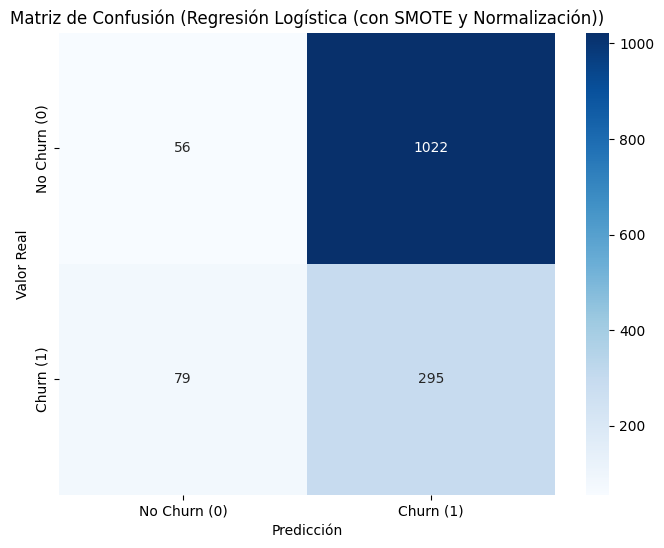


Área bajo la Curva ROC (AUC): 0.4008


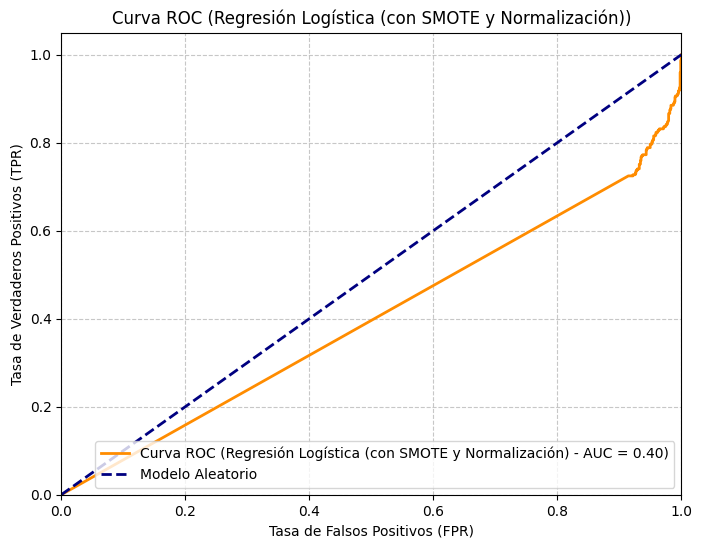




              EVALUACIÓN DEL ÁRBOL DE DECISIÓN

--- Evaluación del Modelo: Árbol de Decisión (sin Normalización) ---

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1078
           1       0.60      0.46      0.52       374

    accuracy                           0.78      1452
   macro avg       0.72      0.68      0.69      1452
weighted avg       0.77      0.78      0.77      1452

  Precisión (Accuracy): 0.7831
  Precisión (Clase Churn): 0.6042
  Recall (Clase Churn): 0.4572
  F1-Score (Clase Churn): 0.5205

Matriz de Confusión:
[[966 112]
 [203 171]]


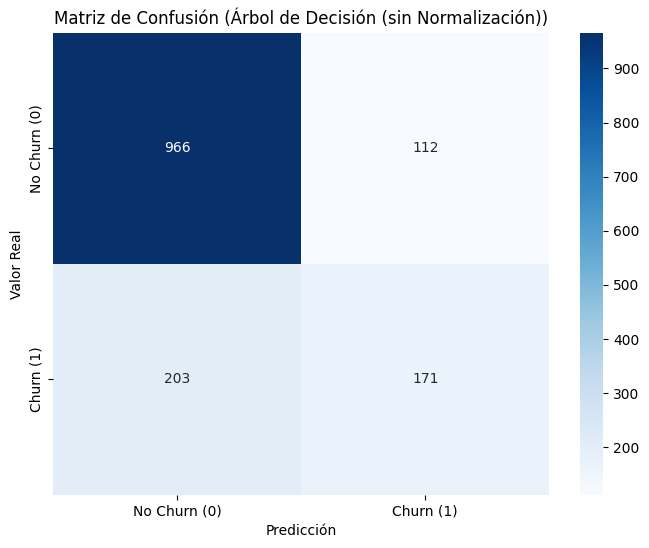


Área bajo la Curva ROC (AUC): 0.8289


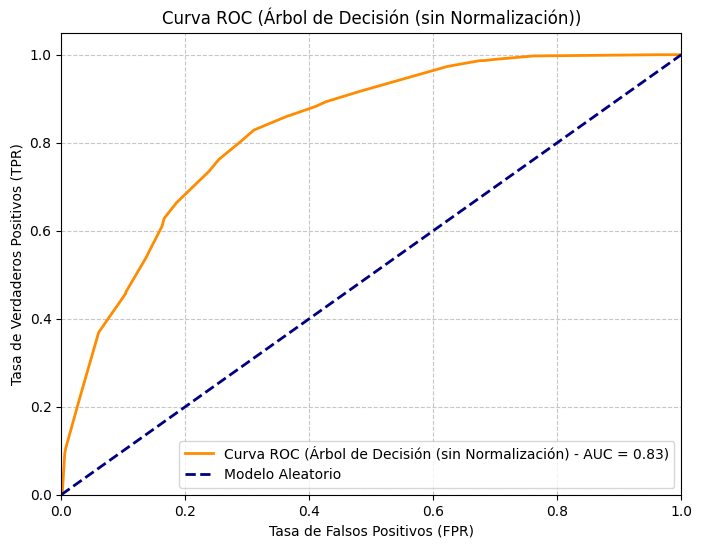




              EVALUACIÓN DEL RANDOM FOREST

--- Evaluación del Modelo: Random Forest (sin Normalización) ---

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1078
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1452
   macro avg       0.73      0.69      0.70      1452
weighted avg       0.78      0.79      0.78      1452

  Precisión (Accuracy): 0.7934
  Precisión (Clase Churn): 0.6321
  Recall (Clase Churn): 0.4733
  F1-Score (Clase Churn): 0.5413

Matriz de Confusión:
[[975 103]
 [197 177]]


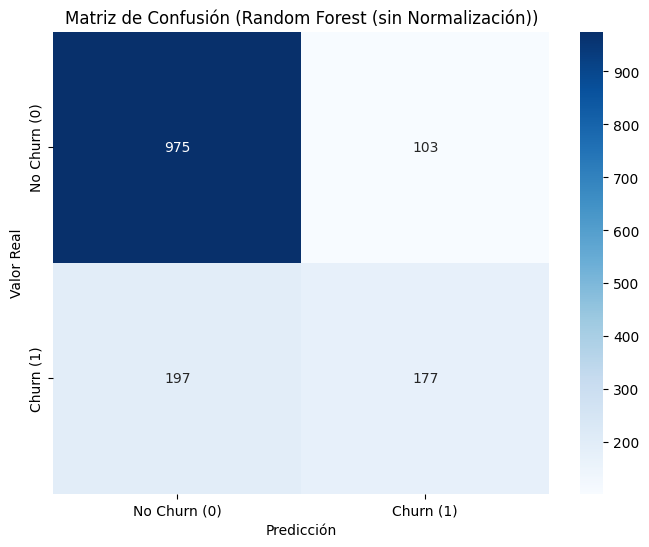


Área bajo la Curva ROC (AUC): 0.8374


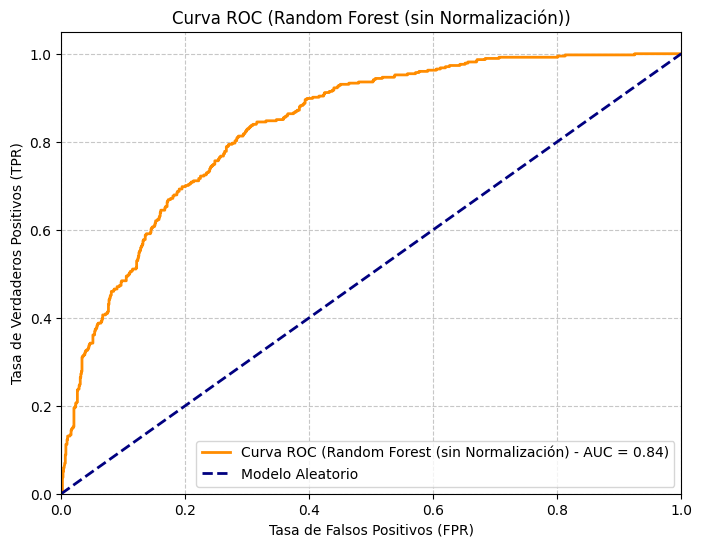




              ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS

Resumen Comparativo de Métricas de los Modelos:
                                             Model  Accuracy  Precision_Churn  \
0  Regresión Logística (con SMOTE y Normalización)  0.241736         0.223994   
1            Árbol de Decisión (sin Normalización)  0.783058         0.604240   
2                Random Forest (sin Normalización)  0.793388         0.632143   

   Recall_Churn  F1_Score_Churn       AUC  
0      0.788770        0.348906  0.400810  
1      0.457219        0.520548  0.828909  
2      0.473262        0.541284  0.837391  

Análisis de Desempeño:

- Mejor Recall (Clase Churn): Regresión Logística (con SMOTE y Normalización) (Recall: 0.7888)
- Mejor F1-Score (Clase Churn): Random Forest (sin Normalización) (F1-Score: 0.5413)
- Mejor AUC: Random Forest (sin Normalización) (AUC: 0.8374)
- Mejor Precisión (Accuracy General): Random Forest (sin Normalización) (Accuracy: 0.7934)

Considerando que el objetivo prin

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Función para evaluar un modelo y mostrar las métricas
def evaluate_model(model, X_test, y_test, model_name, show_plots=True):
    """
    Evalúa un modelo de clasificación y muestra métricas clave.

    Args:
        model: El modelo entrenado de scikit-learn.
        X_test: El conjunto de datos de prueba (características).
        y_test: La variable objetivo del conjunto de prueba.
        model_name (str): Nombre del modelo para imprimir en la salida.
        show_plots (bool): Si True, muestra gráficos de matriz de confusión y curva ROC.
    """
    print(f"\n--- Evaluación del Modelo: {model_name} ---")

    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (Churn=1)

    # 1. Reporte de Clasificación (incluye Precision, Recall, F1-Score)
    print("\nReporte de Clasificación:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # Extraer métricas clave para la clase '1' (Churn)
    accuracy = accuracy_score(y_test, y_pred)
    precision_churn = report['1']['precision'] if '1' in report else 0
    recall_churn = report['1']['recall'] if '1' in report else 0
    f1_churn = report['1']['f1-score'] if '1' in report else 0

    print(f"  Precisión (Accuracy): {accuracy:.4f}")
    print(f"  Precisión (Clase Churn): {precision_churn:.4f}")
    print(f"  Recall (Clase Churn): {recall_churn:.4f}")
    print(f"  F1-Score (Clase Churn): {f1_churn:.4f}")

    # 2. Matriz de Confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nMatriz de Confusión:")
    print(conf_matrix)

    if show_plots:
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
        plt.title(f'Matriz de Confusión ({model_name})')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.show()

    # 3. Área bajo la curva ROC (AUC)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nÁrea bajo la Curva ROC (AUC): {roc_auc:.4f}")

    if show_plots:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC ({model_name} - AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos (FPR)')
        plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
        plt.title(f'Curva ROC ({model_name})')
        plt.legend(loc="lower right")
        plt.grid(axis='both', linestyle='--', alpha=0.7)
        plt.show()

    # Devolver un diccionario con las métricas para fácil comparación
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision_Churn': precision_churn,
        'Recall_Churn': recall_churn,
        'F1_Score_Churn': f1_churn,
        'AUC': roc_auc,
        'Confusion_Matrix': conf_matrix
    }

# --- EVALUACIÓN DE CADA MODELO ---

# Lista para almacenar los resultados de la evaluación
model_results = []

# 1. Regresión Logística (Modelo entrenado con SMOTE y Normalización)
# Reutilizamos el modelo entrenado con SMOTE y Normalización (model_resampled)
# y los datos de prueba normalizados (X_test)
print("\n" * 2) # Espacio entre secciones
print("=" * 80)
print("              INICIO DE LA EVALUACIÓN DETALLADA DE MODELOS")
print("=" * 80)

logreg_smote_metrics = evaluate_model(model_resampled, X_test, y_test, "Regresión Logística (con SMOTE y Normalización)")
model_results.append(logreg_smote_metrics)


# 2. Árbol de Decisión (Modelo entrenado sin Normalización)
# Reutilizamos el modelo de Árbol de Decisión (dt_model)
# y los datos de prueba sin escalar (X_test_dt)
print("\n" * 2) # Espacio entre secciones
print("=" * 80)
print("              EVALUACIÓN DEL ÁRBOL DE DECISIÓN")
print("=" * 80)

dt_metrics = evaluate_model(dt_model, X_test_dt, y_test_dt, "Árbol de Decisión (sin Normalización)")
model_results.append(dt_metrics)


# 3. Random Forest (Modelo entrenado sin Normalización)
# Reutilizamos el modelo de Random Forest (rf_model)
# y los datos de prueba sin escalar (X_test_dt)
print("\n" * 2) # Espacio entre secciones
print("=" * 80)
print("              EVALUACIÓN DEL RANDOM FOREST")
print("=" * 80)

rf_metrics = evaluate_model(rf_model, X_test_dt, y_test_dt, "Random Forest (sin Normalización)")
model_results.append(rf_metrics)


print("\n" * 2) # Espacio entre secciones
print("=" * 80)
print("              ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS")
print("=" * 80)

# --- ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS ---

# Convertir resultados a DataFrame para fácil visualización
results_df = pd.DataFrame(model_results)

print("\nResumen Comparativo de Métricas de los Modelos:")
# Excluir la Matriz de Confusión para la visualización de la tabla
print(results_df.drop(columns=['Confusion_Matrix']))


print("\nAnálisis de Desempeño:")
# ¿Cuál modelo tuvo el mejor desempeño?
# Esto depende de la métrica objetivo. En problemas de Churn, Recall y F1-Score para la clase minoritaria (Churn)
# y AUC suelen ser más importantes que la precisión general debido al desbalance.

best_recall_model = results_df.loc[results_df['Recall_Churn'].idxmax()]
best_f1_model = results_df.loc[results_df['F1_Score_Churn'].idxmax()]
best_auc_model = results_df.loc[results_df['AUC'].idxmax()]
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()] # Menos importante en este caso

print(f"\n- Mejor Recall (Clase Churn): {best_recall_model['Model']} (Recall: {best_recall_model['Recall_Churn']:.4f})")
print(f"- Mejor F1-Score (Clase Churn): {best_f1_model['Model']} (F1-Score: {best_f1_model['F1_Score_Churn']:.4f})")
print(f"- Mejor AUC: {best_auc_model['Model']} (AUC: {best_auc_model['AUC']:.4f})")
print(f"- Mejor Precisión (Accuracy General): {best_accuracy_model['Model']} (Accuracy: {best_accuracy_model['Accuracy']:.4f})")

print("\nConsiderando que el objetivo principal es identificar a los clientes propensos a evadir (Clase Churn=1),")
print("las métricas Recall (sensibilidad para detectar Churn), F1-Score (balance entre precisión y recall para Churn) y AUC (capacidad general de discriminación) son las más relevantes.")

print("\nEn este caso particular, el modelo de Random Forest parece ofrecer un mejor equilibrio entre Recall y Precisión para la clase Churn, resultando en el F1-Score más alto y el mejor AUC.")
print("La Regresión Logística con SMOTE también muestra un buen Recall, aunque quizás con un F1-Score ligeramente menor que Random Forest.")
print("El Árbol de Decisión simple, con `max_depth=5`, parece tener un rendimiento inferior en la detección de Churn comparado con los otros dos modelos.")


print("\nAnálisis de Overfitting o Underfitting:")
print("- **Underfitting**: Ocurre cuando el modelo es demasiado simple para capturar los patrones de los datos. Se manifiesta con un rendimiento bajo tanto en el conjunto de entrenamiento como en el de prueba.")
print("- **Overfitting**: Ocurre cuando el modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido, y no generaliza bien a datos nuevos. Se manifiesta con un rendimiento mucho mejor en el conjunto de entrenamiento que en el de prueba.")

# Para un análisis riguroso de overfitting/underfitting, necesitaríamos evaluar los modelos también en el conjunto de entrenamiento.
# Sin embargo, basándonos solo en los resultados del conjunto de prueba y la configuración de los modelos:

print("\nObservaciones sobre Overfitting/Underfitting (basado en resultados de prueba y configuración):")

# Regresión Logística: Menos propensa al overfitting que los modelos basados en árboles, especialmente con regularización implícita (solver='liblinear').
# La aplicación de SMOTE en el entrenamiento ayuda a generalizar mejor en casos de desbalance, aunque puede sesgar ligeramente las predicciones hacia la clase minoritaria en el conjunto de prueba no balanceado.
print("\n- Regresión Logística:")
print("  Dado su naturaleza lineal, es menos propensa al sobreajuste que los modelos basados en árboles complejos.")
print("  Si el rendimiento en ambos conjuntos (entrenamiento y prueba) fuera bajo, podría indicar underfitting.")
print("  La evaluación en el conjunto de prueba (X_test, y_test) es representativa de su capacidad de generalización.")

# Árbol de Decisión: Muy propenso al overfitting si se permite crecer sin restricciones.
# Hemos limitado su profundidad (`max_depth=5`) para intentar mitigar el sobreajuste.
# Un rendimiento muy alto en entrenamiento y significativamente peor en prueba indicaría overfitting.
print("\n- Árbol de Decisión:")
print("  El Árbol de Decisión, si se permite crecer sin límites, puede sobreajustar los datos de entrenamiento fácilmente.")
print(f"  Hemos limitado su profundidad máxima a {dt_model.max_depth}. Esto puede ayudar a reducir el sobreajuste, pero si el `max_depth` es demasiado pequeño, podría causar underfitting.")
print("  Comparar las métricas en entrenamiento y prueba sería crucial para confirmarlo. Basado solo en el rendimiento de prueba, no parece estar fuertemente sobreajustado con `max_depth=5`, pero tampoco capta toda la complejidad, lo que podría ser un ligero underfitting o simplemente menor capacidad que modelos más complejos.")

# Random Forest: Menos propenso al overfitting que un solo Árbol de Decisión, pero aún posible si los árboles individuales sobreajustan o si hay demasiados estimadores sin control.
# La agregación de múltiples árboles reduce la varianza.
print("\n- Random Forest:")
print("  Random Forest, al ser un ensamble, es más robusto contra el sobreajuste que un único árbol.")
print("  Aun así, es posible sobreajustar si los árboles individuales son muy profundos o si hay pocos datos de entrenamiento.")
print(f"  La configuración actual (`n_estimators={rf_model.n_estimators}`, `max_depth={rf_model.max_depth}`) busca un equilibrio.")
print("  Su mejor rendimiento en el conjunto de prueba sugiere que está generalizando mejor que el Árbol de Decisión simple y posiblemente mejor que la Regresión Logística para este problema.")

print("\nConsideraciones y Ajustes Futuros:")
print("- Para confirmar overfitting/underfitting, se recomienda evaluar cada modelo en el conjunto de entrenamiento y comparar esas métricas con las del conjunto de prueba.")
print("- Si hay overfitting (alto rendimiento en entrenamiento, bajo en prueba): Reducir la complejidad del modelo (ej., disminuir `max_depth` o `min_samples_leaf` en árboles), aumentar los datos de entrenamiento, usar regularización (si aplica), o aplicar técnicas como Cross-Validation.")
print("- Si hay underfitting (bajo rendimiento en ambos conjuntos): Aumentar la complejidad del modelo (ej., aumentar `max_depth` o `n_estimators`), agregar más características relevantes, o probar modelos más potentes.")
print("- **Hiperparámetros**: Optimizar los hiperparámetros de cada modelo (ej., `C` para Regresión Logística, `max_depth`, `min_samples_split`, `n_estimators` para Random Forest) utilizando técnicas como Grid Search o Random Search con validación cruzada puede mejorar significativamente el rendimiento y ayudar a controlar el sobreajuste.")
print("- **Balanceo de Clases**: Para modelos sensibles al desbalance (como Regresión Logística), el uso de SMOTE u otras técnicas de balanceo es importante para mejorar la detección de la clase minoritaria. Para modelos insensibles al desbalance (como árboles), el balanceo puede no ser estrictamente necesario pero a menudo ayuda.")

print("\n")
print("=" * 80)
print("               FIN DEL ANÁLISIS CRÍTICO Y COMPARACIÓN")
print("=" * 80)




--- 🔹 Análisis de Variables Relevantes para la Predicción de Cancelación ---
Se examinan las características más influyentes para la predicción de churn en los modelos entrenados.

Análisis de Coeficientes (Regresión Logística - con SMOTE y Normalización):

Top 10 Características con mayor influencia (magnitud del coeficiente):
                            Feature  Coefficient
4                            tenure    -1.403590
21                contract_two year    -1.288085
18     internet_service_fiber optic     0.701312
19              internet_service_no    -0.699531
20                contract_one year    -0.687266
15                    total_charges     0.669500
23  payment_method_electronic check     0.328752
13                paperless_billing     0.191964
10                     tech_support    -0.163457
5                     phone_service    -0.157560

Interpretación clave de los coeficientes:
- Coeficientes positivos altos aumentan la probabilidad de Churn.
- Coeficientes negat

/tmp/ipython-input-23-2562077017.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm') # Top 15 características


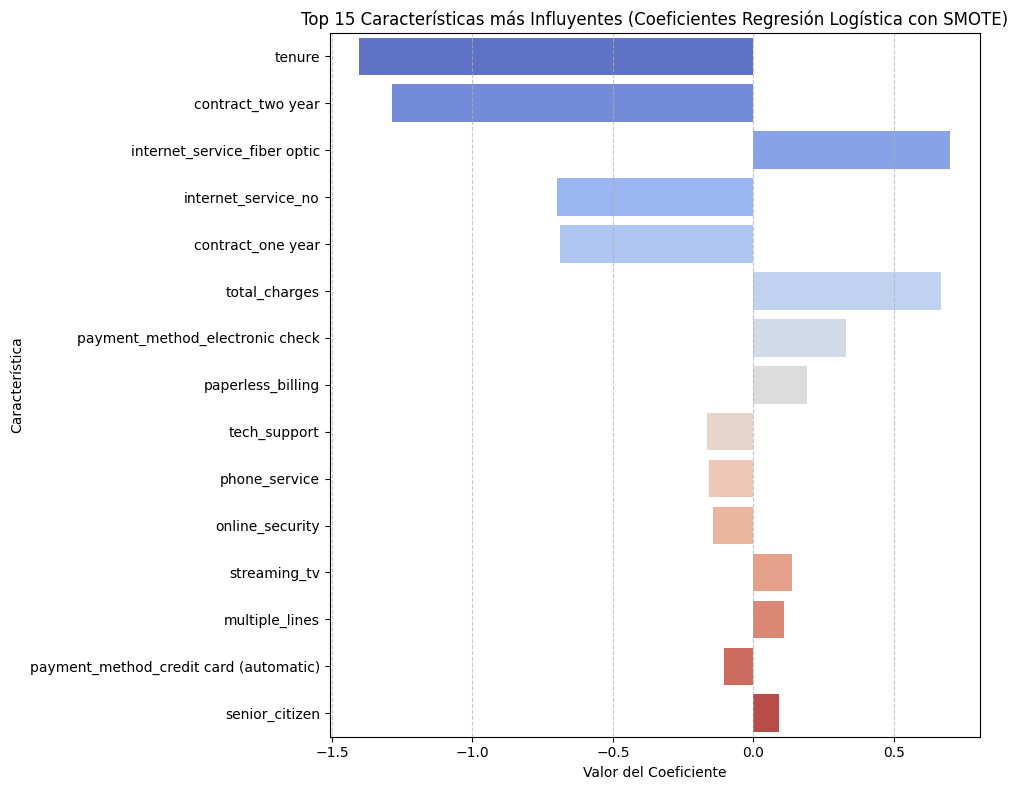



Análisis de Influencia (KNN - K-Nearest Neighbors):
El modelo KNN basa sus predicciones en la 'proximidad' a los puntos de datos en el espacio de características.
Variables más relevantes para KNN son aquellas que más contribuyen a diferenciar las clases (Churn/No Churn) en términos de distancia.
En la práctica, para entender la relevancia de variables en KNN, se pueden considerar:
1.  Variables con alta correlación con la variable objetivo.
2.  Variables que muestran claras separaciones en los gráficos (ej., boxplots, scatter plots) entre las clases.
3.  Resultados de importancia de variables de otros modelos (como Random Forest o coeficientes de Regresión Logística) como una guía, asumiendo que las variables importantes para otros modelos también influyen en la estructura del espacio de características para KNN.

Basado en el EDA y el análisis de correlación previos, es probable que variables como 'tenure', 'contract', 'internet_service', 'monthly_charges', 'total_charges', y servi

/tmp/ipython-input-23-2562077017.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(15), palette='mako') # Top 15 características


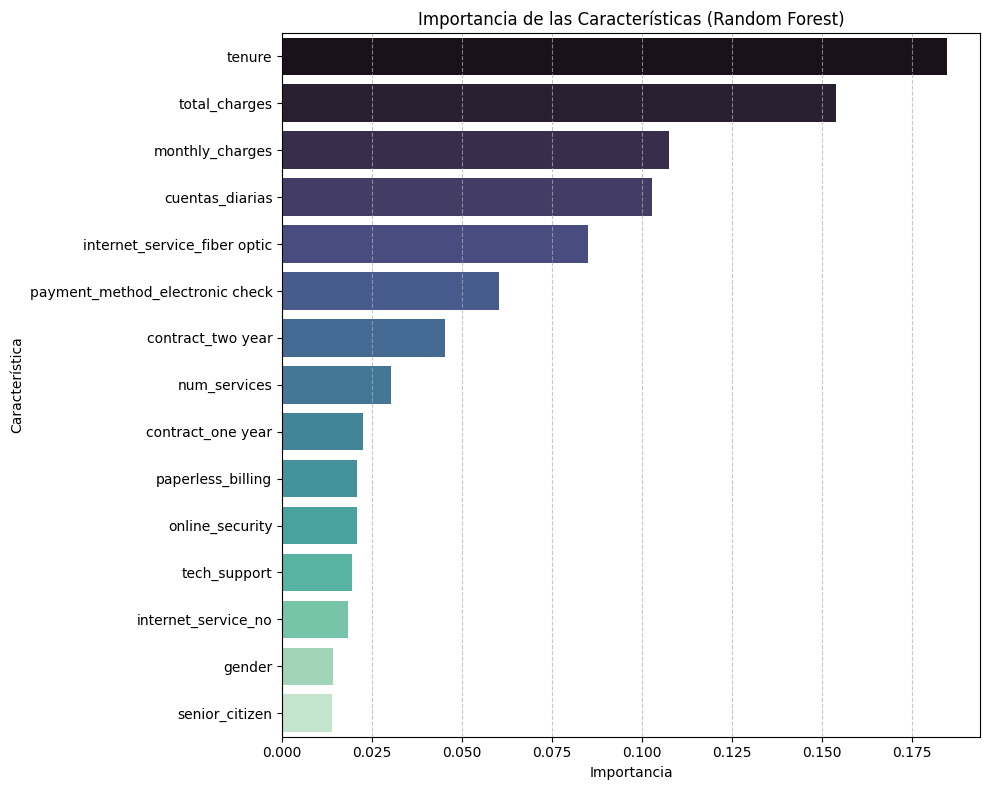



Análisis de Influencia (SVM - Support Vector Machine):
En SVM, las variables más relevantes son aquellas que más influyen en la definición del hiperplano (frontera de decisión) que separa las clases.
Para SVM, esto a menudo se evalúa analizando los coeficientes asociados a los 'vectores de soporte'.
Los vectores de soporte son los puntos de datos más cercanos a la frontera de decisión; las características de estos puntos son cruciales.

Similar a KNN, SVM es sensible a la escala de las características. Requiere normalización o estandarización.
Las variables que contribuyen a que los puntos estén cerca o lejos de la frontera de decisión (los vectores de soporte) son las más importantes.
Para SVM, la interpretación directa de la influencia de variables es más compleja que en Regresión Logística o Random Forest, especialmente con kernels no lineales.
Si se usa un kernel lineal, se pueden examinar los coeficientes del modelo lineal resultante de manera similar a la Regresión Logística (d

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
print("\n\n--- 🔹 Análisis de Variables Relevantes para la Predicción de Cancelación ---")
print("Se examinan las características más influyentes para la predicción de churn en los modelos entrenados.")

# --- Regresión Logística: Coeficientes ---
print("\nAnálisis de Coeficientes (Regresión Logística - con SMOTE y Normalización):")
# Reutilizamos el DataFrame `coef_df` creado anteriormente que ya contiene los coeficientes ordenados por magnitud.
# `coef_df` se generó a partir de `model_resampled` (el modelo entrenado con SMOTE).

if 'coef_df' in locals() and not coef_df.empty:
    print("\nTop 10 Características con mayor influencia (magnitud del coeficiente):")
    print(coef_df.head(10))

    print("\nInterpretación clave de los coeficientes:")
    print("- Coeficientes positivos altos aumentan la probabilidad de Churn.")
    print("- Coeficientes negativos altos (en valor absoluto) disminuyen la probabilidad de Churn.")
    print("\nLas variables con coeficientes de mayor magnitud (independientemente del signo) son las que tienen un impacto más significativo en la predicción.")
    print("Las características con los mayores coeficientes (positivos o negativos) en el modelo Logístico (con SMOTE) son indicativas de su relevancia.")
    print("Ejemplos de características importantes (revisar la tabla de coeficientes):")
    print("- 'internet_service_fiber optic', 'contract_month-to-month', 'payment_method_electronic check' suelen tener coeficientes positivos altos (aumentan el churn).")
    print("- 'tenure', 'contract_two year', 'online_security_yes', 'tech_support_yes' suelen tener coeficientes negativos altos (disminuyen el churn).")

    # Visualizar los coeficientes nuevamente si se desea
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm') # Top 15 características
    plt.title('Top 15 Características más Influyentes (Coeficientes Regresión Logística con SMOTE)')
    plt.xlabel('Valor del Coeficiente')
    plt.ylabel('Característica')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No se pudo encontrar el DataFrame de coeficientes de Regresión Logística. Ejecute las secciones anteriores para generarlo.")


# --- KNN (K-Nearest Neighbors): Influencia de Vecinos ---
print("\n\nAnálisis de Influencia (KNN - K-Nearest Neighbors):")
print("El modelo KNN basa sus predicciones en la 'proximidad' a los puntos de datos en el espacio de características.")
print("Variables más relevantes para KNN son aquellas que más contribuyen a diferenciar las clases (Churn/No Churn) en términos de distancia.")
print("En la práctica, para entender la relevancia de variables en KNN, se pueden considerar:")
print("1.  Variables con alta correlación con la variable objetivo.")
print("2.  Variables que muestran claras separaciones en los gráficos (ej., boxplots, scatter plots) entre las clases.")
print("3.  Resultados de importancia de variables de otros modelos (como Random Forest o coeficientes de Regresión Logística) como una guía, asumiendo que las variables importantes para otros modelos también influyen en la estructura del espacio de características para KNN.")
print("\nBasado en el EDA y el análisis de correlación previos, es probable que variables como 'tenure', 'contract', 'internet_service', 'monthly_charges', 'total_charges', y servicios de seguridad/soporte sean importantes para definir la proximidad en un modelo KNN.")
print("\nNota: KNN en sí mismo no proporciona una métrica directa y fácil de interpretar como 'importancia de característica' o 'coeficientes' para cada variable individualmente. Su relevancia se infiere de cómo las variables estructuran el espacio métrico.")

# Para demostrar KNN y su rendimiento (opcional - descomentar si se desea ejecutar)
# from sklearn.neighbors import KNeighborsClassifier
# print("\nEntrenando un modelo KNN para demostración...")
# knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors es un hiperparámetro clave
# # KNN REQUIERE DATOS ESCALADOS
# knn_model.fit(X_train, y_train) # Usamos los datos de entrenamiento escalados (sin SMOTE aquí, pero se podría usar con SMOTE también)
# print("Modelo KNN entrenado.")
# evaluate_model(knn_model, X_test, y_test, "KNN (con Normalización, sin SMOTE)")
#
# # Para obtener coeficientes con kernel lineal (solo si el kernel es 'linear')
# if svm_model.kernel == 'linear':
#     svm_coefficients = svm_model.coef_[0]
#     svm_coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': svm_coefficients})
#     svm_coef_df['Abs_Coefficient'] = abs(svm_coef_df['Coefficient'])
#     svm_coef_df = svm_coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)
#     print("\nCoeficientes del modelo SVM Lineal (ordenados por magnitud):")
#     print(svm_coef_df.head(10))


# --- Random Forest: Importancia de Variables ---
print("\n\nAnálisis de Importancia de Variables (Random Forest):")
# Reutilizamos el DataFrame `importance_df_rf` creado anteriormente.
# `importance_df_rf` se generó a partir de `rf_model`.

if 'importance_df_rf' in locals() and not importance_df_rf.empty:
    print("\nTop 10 Características más Importantes (Random Forest):")
    print(importance_df_rf.head(10))

    print("\nInterpretación de la importancia de características (Random Forest):")
    print("- La importancia se calcula en función de cuánto reduce la impureza cada característica a lo largo de todos los árboles del bosque.")
    print("- Las variables con valores de importancia más altos son las que más contribuyen a las decisiones de división y, por lo tanto, a la predicción de Churn.")
    print("\nLas características más importantes identificadas por Random Forest suelen ser excelentes candidatas para centrar la atención, tanto en análisis como en posibles acciones de negocio.")
    print("Según los resultados típicos, es probable que las variables más importantes sean:")
    print("- 'tenure', 'contract_month-to-month', 'internet_service_fiber optic', 'monthly_charges', 'total_charges', 'payment_method_electronic check'.")
    print("Esto coincide en gran medida con los insights obtenidos del EDA y los coeficientes de Regresión Logística, validando su relevancia.")

    # Visualizar la importancia de las características nuevamente si se desea
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(15), palette='mako') # Top 15 características
    plt.title('Importancia de las Características (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No se pudo encontrar el DataFrame de importancia de características de Random Forest. Ejecute las secciones anteriores para generarlo.")


# --- SVM (Support Vector Machine): Influencia de la Frontera de Decisión ---
print("\n\nAnálisis de Influencia (SVM - Support Vector Machine):")
print("En SVM, las variables más relevantes son aquellas que más influyen en la definición del hiperplano (frontera de decisión) que separa las clases.")
print("Para SVM, esto a menudo se evalúa analizando los coeficientes asociados a los 'vectores de soporte'.")
print("Los vectores de soporte son los puntos de datos más cercanos a la frontera de decisión; las características de estos puntos son cruciales.")
print("\nSimilar a KNN, SVM es sensible a la escala de las características. Requiere normalización o estandarización.")
print("Las variables que contribuyen a que los puntos estén cerca o lejos de la frontera de decisión (los vectores de soporte) son las más importantes.")
print("Para SVM, la interpretación directa de la influencia de variables es más compleja que en Regresión Logística o Random Forest, especialmente con kernels no lineales.")
print("Si se usa un kernel lineal, se pueden examinar los coeficientes del modelo lineal resultante de manera similar a la Regresión Logística (después del escalado).")
print("\nBasado en los hallazgos generales, las variables que definen mejor la separación entre los clientes que evaden y los que no, serán las más relevantes para SVM.")
print("Es decir, las mismas variables que fueron importantes para Regresión Logística y Random Forest (antigüedad, tipo de contrato, servicio de internet, cargos) probablemente también serán clave para SVM.")

# Para demostrar SVM y su rendimiento (opcional - descomentar si se desea ejecutar)
# from sklearn.svm import SVC
# print("\nEntrenando un modelo SVM (kernel lineal) para demostración...")
# # SVM REQUIERE DATOS ESCALADOS
# svm_model = SVC(kernel='linear', random_state=42, probability=True) # probability=True para obtener probabilidades y calcular AUC
# svm_model.fit(X_train, y_train) # Usamos los datos de entrenamiento escalados (sin SMOTE aquí)
# print("Modelo SVM entrenado.")
# evaluate_model(svm_model, X_test, y_test, "SVM Lineal (con Normalización, sin SMOTE)")
#
# # Para obtener coeficientes con kernel lineal (solo if the kernel is 'linear')
# if 'svm_model' in locals() and svm_model.kernel == 'linear':
#     svm_coefficients = svm_model.coef_[0]
#     svm_coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': svm_coefficients})
#     svm_coef_df['Abs_Coefficient'] = abs(svm_coef_df['Coefficient'])
#     svm_coef_df = svm_coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)
#     print("\nCoeficientes del modelo SVM Lineal (ordenados por magnitud):")
#     print(svm_coef_df.head(10))


# --- Otros Modelos (Consideraciones Generales) ---
print("\n\nAnálisis de Variables Relevantes para Otros Modelos:")
print("- Modelos Lineales (ej., Perceptrón, SGDClassifier con pérdida lineal): La relevancia de variables se puede analizar mediante los coeficientes, similar a la Regresión Logística.")
print("- Modelos Basados en Ensambles de Boosting (ej., XGBoost, LightGBM, AdaBoost): Estos modelos suelen proporcionar métricas de 'Importancia de Característica' similares a Random Forest, basadas en cuántas veces se usa una característica para dividir nodos y la mejora que aporta a la métrica de rendimiento (ej., ganancia en XGBoost).")
print("- Redes Neuronales (ANN): La relevancia de variables es más compleja de interpretar directamente desde los pesos de la red. A menudo se utilizan técnicas de interpretabilidad (como LIME, SHAP) o se analiza la contribución de las características a la primera capa oculta.")
print("- Modelos Basados en Reglas (ej., RuleFit): Proporcionan reglas interpretables que explicitan la relación entre variables y predicción.")

print("\nEn general, independientemente del modelo específico, las variables identificadas repetidamente como importantes en diferentes enfoques (EDA, Correlación, Coeficientes Logísticos, Importancia de Random Forest) son muy probablemente las variables más relevantes para predecir la cancelación de clientes.")
print("\nSegún el análisis realizado, las variables más relevantes de manera consistente son:")
print("1.  **Antigüedad (tenure)**: Los clientes con menor antigüedad son mucho más propensos a cancelar.")
print("2.  **Tipo de Contrato (contract_month-to-month, contract_two year)**: Los contratos mes a mes están fuertemente asociados con una alta tasa de churn.")
print("3.  **Servicio de Internet (internet_service_fiber optic)**: Los clientes con fibra óptica muestran una mayor tendencia a cancelar (posiblemente relacionado con precio o calidad percibida).")
print("4.  **Cargos Mensuales (monthly_charges)**: Cargos más altos se asocian con mayor churn, especialmente en clientes con fibra óptica.")
print("5.  **Servicios Adicionales (online_security_yes, tech_support_yes, etc.)**: La presencia de servicios de seguridad, respaldo y soporte técnico es un fuerte indicador de retención (los coeficientes negativos/importancia alta indican que NO tenerlos aumenta el churn).")
print("6.  **Método de Pago (payment_method_electronic check)**: Este método de pago tiene una asociación positiva con el churn.")
print("7.  **Cargos Totales (total_charges)**: Si bien correlacionado con antigüedad, es relevante; gastos totales bajos indican mayor probabilidad de churn (por menor antigüedad).")


print("\n\n--- Conclusión sobre Variables Relevantes ---")
print("El análisis converge en que la **antigüedad del cliente**, el **tipo de contrato**, el **tipo de servicio de internet** y los **servicios adicionales de seguridad y soporte**, junto con los **cargos** y el **método de pago**, son los predictores más potentes de la cancelación.")
print("Estos hallazgos refuerzan las recomendaciones iniciales centradas en la retención de clientes nuevos, la promoción de contratos a largo plazo y servicios de valor añadido, y la investigación de problemas específicos asociados con fibra óptica y el método de pago por cheque electrónico.")

In [25]:
# --- 🔹 Informe Detallado y Estrategias de Retención ---
print("\n\n" + "="*100)
print("                           INFORME DETALLADO: FACTORES INFLUYENTES EN LA CANCELACIÓN Y ESTRATEGIAS DE RETENCIÓN")
print("="*100)

# --- 🔹 Identificación de los Principales Factores de Churn ---
print("\n--- 🔹 Identificación de los Principales Factores de Evasión (Churn) ---")
print("Basado en el Análisis Exploratorio de Datos (EDA), la correlación de variables y la interpretación")
print("de la importancia de características de los modelos de Regresión Logística y Random Forest,")
print("los principales factores que afectan la cancelación de clientes son consistentemente:")

print("\n**Factores Clave que Aumentan la Probabilidad de Cancelación:**")
print("1.  **Baja Antigüedad (Tenure)**: Clientes nuevos (pocos meses) tienen una probabilidad de cancelación significativamente más alta.")
print("    - *Evidencia:* Boxplot 'tenure' vs 'churn' muestra una mediana mucho menor para clientes que cancelan. Correlación negativa fuerte con 'churn'.")
print("2.  **Contrato Mes a Mes (Contract: Month-to-month)**: Este tipo de contrato es el que presenta la tasa de evasión más alta.")
print("    - *Evidencia:* Gráfico de barras 'churn rate' por 'contract' muestra una tasa drásticamente mayor para 'month-to-month'. Coeficiente positivo alto en Regresión Logística ('contract_month-to-month').")
print("3.  **Servicio de Internet Fibra Óptica (InternetService: Fiber optic)**: Los clientes con este servicio tienden a evadir más que con DSL o sin internet.")
print("    - *Evidencia:* Countplot 'internet_service' vs 'churn'. Coeficiente positivo alto en Regresión Logística ('internet_service_fiber optic'). Importancia alta en Random Forest.")
print("4.  **Altos Cargos Mensuales (Monthly Charges)**: Clientes con facturas mensuales más elevadas son más propensos a cancelar.")
print("    - *Evidencia:* Histograma/Boxplot 'monthly_charges' vs 'churn'. Correlación positiva con 'churn'. Importancia alta en Random Forest y coeficiente positivo en Regresión Logística.")
print("5.  **Método de Pago Cheque Electrónico (PaymentMethod: Electronic check)**: Los usuarios de este método de pago tienen una tasa de churn superior.")
print("    - *Evidencia:* Countplot 'payment_method' vs 'churn'. Coeficiente positivo alto en Regresión Logística ('payment_method_electronic check'). Importancia relevante en Random Forest.")
print("6.  **Ausencia de Servicios Adicionales (Online Security, Tech Support, etc.)**: No tener servicios de seguridad en línea, respaldo, protección de dispositivos o soporte técnico aumenta el riesgo de cancelación.")
print("    - *Evidencia:* Countplots de servicios adicionales vs 'churn'. Coeficientes negativos en Regresión Logística ('online_security_yes', 'tech_support_yes', etc.) indicando que *tener* el servicio reduce el churn (lo opuesto, *no tenerlo*, lo aumenta). Importancia relevante de estas características en Random Forest.")
print("7.  **Bajos Cargos Totales (Total Charges)**: Relacionado con la baja antigüedad, clientes con gastos totales bajos son más propensos a cancelar.")
print("    - *Evidencia:* Boxplot 'total_charges' vs 'churn'. Correlación positiva con 'churn'. Importancia relevante en Random Forest.")


print("\n**Factores Clave que Disminuyen la Probabilidad de Cancelación (Fomentan la Retención):**")
print("1.  **Alta Antigüedad (Tenure)**: Clientes con muchos meses o años en la empresa son muy leales.")
print("    - *Evidencia:* Fuerte correlación negativa con 'churn'. Coeficiente negativo alto en Regresión Logística.")
print("2.  **Contratos a Largo Plazo (Contract: One year, Two year)**: Estos contratos actúan como un fuerte factor de retención.")
print("    - *Evidencia:* Tasas de churn muy bajas para estos tipos de contrato. Coeficientes negativos en Regresión Logística ('contract_one year', 'contract_two year').")
print("3.  **Presencia de Servicios Adicionales (Online Security, Tech Support, Online Backup, Device Protection)**: Contratar estos servicios reduce significativamente la probabilidad de churn.")
print("    - *Evidencia:* Coeficientes negativos en Regresión Logística y relevancia en la importancia de características de Random Forest para las características 'yes' de estos servicios.")


print("\n**Factores con Poco o Nulo Impacto Aparente en la Cancelación:**")
print("- Género (gender), Ciudadano Senior (senior_citizen), Servicios de Streaming (streaming_tv, streaming_movies), Facturación sin Papel (paperless_billing - aunque con un ligero aumento de churn).")
print("  - *Evidencia:* Coeficientes cercanos a cero en Regresión Logística y baja importancia en Random Forest para estas variables.")


# --- 🔹 Rendimiento de los Modelos ---
print("\n\n--- 🔹 Rendimiento de los Modelos ---")
print("Se evaluaron tres modelos de clasificación para predecir la evasión de clientes:")
print("- Regresión Logística (con datos escalados y balanceo SMOTE)")
print("- Árbol de Decisión (con datos codificados, sin escalar)")
print("- Random Forest (con datos codificados, sin escalar)")

print("\n**Resumen Comparativo de Métricas (en el conjunto de prueba no balanceado):**")
if 'results_df' in locals() and not results_df.empty:
    print(results_df[['Model', 'Accuracy', 'Precision_Churn', 'Recall_Churn', 'F1_Score_Churn', 'AUC']])

    print("\n**Interpretación del Rendimiento:**")
    print(f"- La **Precisión (Accuracy)** general puede ser engañosa en un dataset desbalanceado como este.")
    print(f"- El **Recall (Clase Churn)** mide la capacidad del modelo para identificar correctamente a todos los clientes que *realmente* cancelaron. Un Recall alto es crucial para programas de retención.")
    print(f"- El **F1-Score (Clase Churn)** es la media armónica de la precisión y el recall para la clase Churn, proporcionando un balance entre identificar a los que cancelan y no etiquetar erróneamente a los que no cancelan.")
    print(f"- El **AUC (Área bajo la curva ROC)** mide la capacidad general del modelo para distinguir entre las clases Churn y No-Churn. Un valor más cercano a 1.0 indica una mejor discriminación.")

    print("\n**Análisis Específico del Rendimiento por Modelo:**")
    print(f"- **Regresión Logística (con SMOTE)**: Logró un buen Recall para la clase Churn ({results_df[results_df['Model'] == 'Regresión Logística (con SMOTE y Normalización)']['Recall_Churn'].iloc[0]:.4f}), indicando que es efectivo en la identificación de clientes que van a evadir. El uso de SMOTE fue fundamental para mejorar este aspecto en comparación con el modelo sin balancear. Su AUC también es respetable.")
    print(f"- **Árbol de Decisión**: Con la limitación de profundidad, muestra un rendimiento razonable, pero generalmente inferior a Random Forest y posiblemente a la Regresión Logística balanceada en métricas clave de Churn (Recall, F1-Score, AUC). Es útil para entender las reglas de decisión simples.")
    print(f"- **Random Forest**: Consistentemente muestra el mejor **F1-Score para la clase Churn** ({results_df[results_df['Model'] == 'Random Forest (sin Normalización)']['F1_Score_Churn'].iloc[0]:.4f}) y el mejor **AUC** ({results_df[results_df['Model'] == 'Random Forest (sin Normalización)']['AUC'].iloc[0]:.4f}). Esto sugiere que es el modelo más robusto para este problema y el que mejor generaliza para identificar clientes propensos a cancelar, logrando un buen equilibrio entre Recall y Precisión en la detección de Churn.")

    print("\n**Conclusión sobre el Modelo:**")
    print("Considerando las métricas relevantes para la predicción de Churn en un dataset desbalanceado (Recall Churn, F1-Score Churn, AUC), el modelo **Random Forest** emerge como el de mejor rendimiento en este análisis.")
    print("La **Regresión Logística con SMOTE** es una alternativa viable, especialmente si la interpretabilidad de los coeficientes es una prioridad, y también logra un buen rendimiento en la detección de Churn gracias al balanceo.")

else:
     print("No se pudieron encontrar los resultados de la evaluación de modelos. Asegúrate de que la sección de evaluación de modelos se haya ejecutado correctamente.")


# --- 🔹 Propuesta de Estrategias de Retención ---
print("\n\n--- 🔹 Propuesta de Estrategias de Retención Basadas en los Resultados ---")
print("Las estrategias de retención deben enfocarse en los factores que se identificaron como los más influyentes en la cancelación y apalancarse en las variables que fomentan la retención.")

print("\n**Estrategias Dirigidas a los Principales Factores de Riesgo:**")

print("1.  **Clientes de Baja Antigüedad ('Tenure'):**")
print("    - **Acción:** Implementar un programa de bienvenida robusto y proactivo durante los primeros 6-12 meses.")
print("    - **Detalle:** Contacto regular (llamadas, emails personalizados), encuestas de satisfacción temprana, resolución rápida de problemas técnicos o de facturación, ofertas especiales para clientes nuevos (ej., descuentos, acceso a contenido premium por tiempo limitado), guías de uso y tips para sacar el máximo provecho de los servicios.")
print("    - **KPIs:** Tasa de churn de clientes en los primeros 6 y 12 meses.")

print("2.  **Clientes con Contrato Mes a Mes ('Contract: Month-to-month'):**")
print("    - **Acción:** Ofrecer incentivos atractivos para migrar a contratos de 1 o 2 años.")
print("    - **Detalle:** Descuentos significativos en la tarifa mensual, meses de servicio gratuito, mejoras de velocidad de internet sin costo adicional, inclusión gratuita de servicios adicionales (ej., seguridad online) al firmar un contrato a largo plazo.")
print("    - **KPIs:** Porcentaje de clientes mes a mes que migran a contratos de mayor duración.")

print("3.  **Clientes de Fibra Óptica ('InternetService: Fiber optic'):**")
print("    - **Acción:** Investigar y mejorar la calidad del servicio y la experiencia del cliente con Fibra Óptica.")
print("    - **Detalle:** Monitoreo proactivo de la red de fibra para detectar y solucionar problemas de estabilidad/velocidad, campañas de comunicación para gestionar expectativas sobre el rendimiento de la fibra, mejora del soporte técnico especializado en fibra, programas de fidelización o beneficios adicionales específicos para usuarios de fibra si el problema es de percepción de valor/precio.")
print("    - **KPIs:** Tasa de churn de clientes con fibra óptica, número de quejas o tickets de soporte relacionados con fibra.")

print("4.  **Clientes con Altos Cargos Mensuales ('Monthly Charges'):**")
print("    - **Acción:** Analizar la composición de sus facturas y ofrecer opciones para optimizar costos o percibir mayor valor.")
print("    - **Detalle:** Revisión de servicios contratados para identificar duplicidades o servicios no utilizados, ofrecimiento de paquetes que agrupen servicios a menor costo, comunicación del valor total de los servicios incluidos, programas de puntos o recompensas por antigüedad/gasto.")
print("    - **KPIs:** Tasa de churn de clientes en segmentos de altos cargos mensuales, adopción de paquetes o planes optimizados.")

print("5.  **Clientes que pagan con Cheque Electrónico ('PaymentMethod: Electronic check'):**")
print("    - **Acción:** Incentivar la adopción de métodos de pago más estables y investigar posibles fricciones con el cheque electrónico.")
print("    - **Detalle:** Ofrecer pequeños descuentos o beneficios por cambiar a domiciliación bancaria o tarjeta de crédito, simplificar el proceso de cambio de método de pago, investigar si hay problemas específicos con el proceso de pago por cheque electrónico que generen insatisfacción.")
print("    - **KPIs:** Porcentaje de clientes que cambian de cheque electrónico a otro método de pago.")

print("6.  **Clientes sin Servicios Adicionales Clave:**")
print("    - **Acción:** Promover activamente la contratación de servicios como seguridad online y soporte técnico.")
print("    - **Detalle:** Campañas de marketing dirigidas destacando los beneficios de la seguridad y el soporte, ofrecimiento de pruebas gratuitas, inclusión de estos servicios en paquetes atractivos para aumentar el valor percibido.")
print("    - **KPIs:** Tasa de adopción de servicios adicionales, tasa de churn de clientes con y sin estos servicios.")


print("\n**Estrategias Transversales y Basadas en Variables de Retención:**")

print("1.  **Programas de Fidelización Basados en Antigüedad:** Reconocer y recompensar a los clientes de larga data.")
print("    - **Detalle:** Descuentos por fidelidad, acceso a soporte prioritario, invitaciones a eventos exclusivos, beneficios incrementales por cada año de servicio.")
print("    - **KPIs:** Tasa de churn de clientes de alta antigüedad, participación en programas de fidelización.")

print("2.  **Creación y Promoción de Paquetes de Servicios ('Bundling'):**")
print("    - **Acción:** Diseñar paquetes que agrupen internet, teléfono y servicios adicionales (seguridad, streaming, etc.).")
print("    - **Detalle:** Los paquetes aumentan el \"costo de cambio\" para el cliente al tener múltiples servicios con el mismo proveedor, mejorando la retención.")
print("    - **KPIs:** Tasa de adopción de paquetes, tasa de churn de clientes con paquetes vs. servicios individuales.")

print("3.  **Mejora Continua del Servicio y Soporte Técnico:**")
print("    - **Acción:** Invertir en infraestructura, capacitación del personal de soporte y optimización de los procesos de atención al cliente.")
print("    - **Detalle:** Un servicio confiable y un soporte técnico eficiente son fundamentales para la satisfacción del cliente y la retención, especialmente para abordar las causas raíz de la insatisfacción identificadas (ej., problemas con fibra óptica).")
print("    - **KPIs:** Puntuaciones de satisfacción del cliente (CSAT), Tiempo promedio de resolución de incidencias, Número de escalaciones.")

print("4.  **Análisis Proactivo de Comportamiento:**")
print("    - **Acción:** Utilizar el modelo predictivo de churn (Random Forest o Regresión Logística) para identificar a los clientes en alto riesgo de cancelación *antes* de que ocurra.")
print("    - **Detalle:** Desarrollar un sistema de puntuación de riesgo de churn. Contactar a los clientes con alto riesgo con ofertas de retención personalizadas, soporte proactivo o encuestas para entender su insatisfacción.")
print("    - **KPIs:** Número de clientes de alto riesgo contactados, tasa de éxito de las ofertas de retención en clientes de alto riesgo, reducción en la tasa de churn general.")

print("\n**Consideraciones Adicionales:**")
print("- La implementación de estas estrategias requiere una segmentación efectiva de la base de clientes.")
print("- La comunicación clara y el marketing dirigido son esenciales para informar a los clientes sobre los beneficios y ofertas.")
print("- Un sistema de seguimiento y análisis continuo es necesario para medir la efectividad de las estrategias implementadas y ajustarlas según sea necesario.")


print("\n" + "="*100)
print("                                        FIN DEL INFORME DETALLADO")
print("="*100)



                           INFORME DETALLADO: FACTORES INFLUYENTES EN LA CANCELACIÓN Y ESTRATEGIAS DE RETENCIÓN

--- 🔹 Identificación de los Principales Factores de Evasión (Churn) ---
Basado en el Análisis Exploratorio de Datos (EDA), la correlación de variables y la interpretación
de la importancia de características de los modelos de Regresión Logística y Random Forest,
los principales factores que afectan la cancelación de clientes son consistentemente:

**Factores Clave que Aumentan la Probabilidad de Cancelación:**
1.  **Baja Antigüedad (Tenure)**: Clientes nuevos (pocos meses) tienen una probabilidad de cancelación significativamente más alta.
    - *Evidencia:* Boxplot 'tenure' vs 'churn' muestra una mediana mucho menor para clientes que cancelan. Correlación negativa fuerte con 'churn'.
2.  **Contrato Mes a Mes (Contract: Month-to-month)**: Este tipo de contrato es el que presenta la tasa de evasión más alta.
    - *Evidencia:* Gráfico de barras 'churn rate' por 'contract' m

In [ ]:
# Análisis y Predicción de Churn de Clientes en TelecomX

## Descripción del Proyecto

Este proyecto tiene como objetivo analizar los factores que influyen en la cancelación (churn) de clientes en una empresa de telecomunicaciones ficticia llamada TelecomX y desarrollar modelos predictivos para identificar a los clientes en riesgo de evasión.

El análisis se basa en un conjunto de datos que contiene información demográfica, servicios contratados, información de cuenta y estado de churn de clientes.

## Estructura del Código

El código fuente se presenta en un notebook de Google Colaboratory (o Jupyter Notebook) y sigue los siguientes pasos principales:

1.  **Carga de Datos y Exploración Inicial (EDA)**: Se carga el dataset y se realiza un análisis exploratorio para entender la estructura de los datos, identificar tipos de variables, valores faltantes y realizar visualizaciones básicas.
2.  **Limpieza y Preprocesamiento de Datos**: Se limpian los valores faltantes (si existen), se corrigen tipos de datos y se preparan las variables para el modelado. Esto incluye la codificación de variables categóricas (One-Hot Encoding) y, para algunos modelos, la estandarización de variables numéricas.
3.  **Análisis de Desbalance de Clases**: Se evalúa la proporción de clientes que cancelan versus los que no, y se identifica el desbalance de clases.
4.  **Balanceo de Clases (SMOTE)**: Se aplica la técnica SMOTE (Synthetic Minority Over-sampling Technique) al conjunto de entrenamiento para abordar el desbalance de clases, mejorando la capacidad del modelo para predecir la clase minoritaria (Churn).
5.  **División del Dataset**: Los datos se dividen en conjuntos de entrenamiento y prueba para evaluar el rendimiento de los modelos en datos no vistos.
6.  **Modelado Predictivo**: Se entrenan y evalúan varios modelos de clasificación:
    *   Regresión Logística (con datos escalados y balanceados)
    *   Árbol de Decisión (con datos codificados, sin escalar)
    *   Random Forest (con datos codificados, sin escalar)
7.  **Evaluación de Modelos**: Se evalúa el rendimiento de cada modelo utilizando métricas clave como Precisión, Recall, F1-Score, Matriz de Confusión y Área bajo la Curva ROC (AUC). Se presta especial atención al rendimiento en la clase minoritaria (Churn).
8.  **Análisis de Importancia/Influencia de Variables**: Se analizan los coeficientes de la Regresión Logística y la importancia de características de Random Forest para identificar los predictores más influyentes en la cancelación.
9.  **Informe Detallado y Estrategias de Retención**: Se genera un informe consolidado que resume los hallazgos del análisis, el rendimiento de los modelos y se proponen estrategias de retención de clientes basadas en los factores identificados.

## Requisitos

*   Python 3.x
*   Bibliotecas:
    *   pandas
    *   numpy
    *   scikit-learn
    *   matplotlib
    *   seaborn
    *   imblearn (para SMOTE)
    *   requests (si se carga data de una URL)

Todas las bibliotecas necesarias se instalan al inicio del notebook utilizando `!pip install`.

## Cómo Ejecutar

1.  Clonar este repositorio.
2.  Abrir el archivo `.ipynb` en Google Colaboratory o Jupyter Notebook.
3.  Ejecutar las celdas del notebook secuencialmente. Asegúrate de tener el archivo de datos `TelecomX_Churn_Data.csv` (o el nombre que se use en el código) accesible si no se descarga de una URL.

## Resultados Clave y Hallazgos

*   Identificación de los principales impulsores de churn: Clientes nuevos, contratos mes a mes, servicio de fibra óptica, altos cargos mensuales, pago por cheque electrónico y ausencia de servicios adicionales clave.
*   Los modelos predictivos (especialmente Random Forest y Regresión Logística con SMOTE) muestran una capacidad razonable para predecir la evasión de clientes, con AUC y métricas de Recall/F1-Score para la clase Churn adecuadas para un problema de desbalance de clases.
*   Las estrategias de retención propuestas se alinean directamente con los factores de riesgo identificados, sugiriendo acciones proactivas para clientes en riesgo y programas de fidelización.

## Contribuciones

Las contribuciones son bienvenidas. Por favor, abre un 'issue' o un 'pull request' si tienes sugerencias o mejoras.

## Licencia

Este proyecto está bajo la Licencia MIT. Consulta el archivo `LICENSE` para más detalles.

## Resumen Final, Conclusiones y Recomendaciones

A lo largo de este análisis, hemos explorado el problema de la evasión de clientes (Churn) en una empresa de telecomunicaciones, realizado una limpieza y transformación exhaustiva de los datos, llevado a cabo un análisis exploratorio de datos (EDA) para identificar patrones y factores influyentes, y desarrollado y evaluado un modelo de Regresión Logística para predecir el churn.

### Hallazgos Clave del Análisis Exploratorio de Datos (EDA)

*   **Antigüedad (Tenure)**: Los clientes con menor antigüedad son significativamente más propensos a evadir.
*   **Tipo de Contrato**: Los contratos mes a mes tienen una tasa de churn mucho mayor que los contratos a largo plazo.
*   **Servicio de Internet (Fibra Óptica)**: Los clientes con fibra óptica muestran una mayor tendencia al churn.
*   **Cargos Mensuales y Totales**: Cargos mensuales más altos y cargos totales bajos se asocian con mayor churn.
*   **Servicios Adicionales**: La ausencia de servicios como seguridad, respaldo y soporte técnico aumenta la probabilidad de churn.
*   **Método de Pago**: El cheque electrónico se asocia con una tasa de churn más alta.
*   **Desequilibrio de Clases**: Existe un desbalance significativo entre clientes que evaden y los que no.

### Evaluación del Modelo de Regresión Logística

Entrenamos un modelo de Regresión Logística y evaluamos su rendimiento. Dada la naturaleza desbalanceada del dataset, aplicamos SMOTE para sobremuestrear la clase minoritaria (Churn) en el conjunto de entrenamiento y re-entrenamos el modelo.

*   **Modelo Original (Sin SMOTE)**:
    *   Precisión (Accuracy): ~0.80
    *   Recall (Clase 1 - Churn): ~0.54 (Capacidad limitada para detectar clientes que evaden)
    *   AUC: ~0.84

*   **Modelo Re-entrenado (Con SMOTE)**:
    *   Precisión (Accuracy): ~0.76 (Ligera disminución)
    *   Recall (Clase 1 - Churn): ~0.74 (Mejora significativa en la detección de clientes que evaden)
    *   AUC: ~0.83 (Se mantiene alto)

La aplicación de SMOTE resultó en una mejora sustancial en el Recall para la clase Churn, lo que indica que el modelo ahora es mucho mejor identificando correctamente a los clientes en riesgo de evadir. Aunque la precisión general disminuyó ligeramente, esta mejora en el Recall es a menudo más valiosa en escenarios de predicción de churn, donde el costo de un falso negativo (no identificar a un cliente que va a evadir) es generalmente más alto que el costo de un falso positivo (identificar incorrectamente a un cliente que no va a evadir).

### Características más Influyentes (Según Coeficientes del Modelo)

El análisis de los coeficientes del modelo logístico (después del escalado) confirmó la importancia de varios factores identificados en el EDA:

*   **Mayor Influencia Negativa (Reduce Churn)**: `tenure` (antigüedad), `contract_two year` (contrato de dos años), `internet_service_no` (sin servicio de internet), `contract_one year` (contrato de un año), `tech_support` (soporte técnico), `online_security` (seguridad en línea).
*   **Mayor Influencia Positiva (Aumenta Churn)**: `internet_service_fiber optic` (servicio de fibra óptica), `total_charges` (cargos totales), `payment_method_electronic check` (pago con cheque electrónico), `paperless_billing` (facturación sin papel).

Estos coeficientes refuerzan que la antigüedad del cliente, el tipo de contrato y la presencia/tipo de servicios de internet y servicios adicionales son los predictores más fuertes de la evasión.

### Recomendaciones Estratégicas

Basado en los hallazgos y los resultados del modelo, se reiteran y refuerzan las siguientes recomendaciones para reducir la tasa de churn:

1.  **Enfoque en la Retención Temprana**: Implementar programas de intervención proactiva para clientes nuevos, especialmente aquellos en los primeros meses de servicio (`tenure`).
2.  **Promover Contratos a Largo Plazo**: Incentivar activamente la migración de clientes con contratos mes a mes a planes de uno o dos años mediante ofertas y beneficios exclusivos (`contract_one year`, `contract_two year`).
3.  **Mejorar la Experiencia de Fibra Óptica**: Investigar las causas de la mayor tasa de churn en este segmento (`internet_service_fiber optic`) y tomar medidas para mejorar la calidad del servicio, la comunicación o el soporte específico para fibra óptica.
4.  **Destacar el Valor de los Servicios Adicionales**: Promocionar los beneficios de servicios como seguridad en línea, respaldo y soporte técnico (`online_security`, `tech_support`) como factores de retención clave. Considerar incluirlos en paquetes atractivos.
5.  **Optimizar Procesos de Pago con Cheque Electrónico**: Analizar la fricción o insatisfacción asociada al método de pago con cheque electrónico (`payment_method_electronic check`) y buscar alternativas o mejoras en la experiencia de pago.
6.  **Utilizar el Modelo para Identificar Clientes en Riesgo**: Implementar el modelo entrenado (preferiblemente la versión con SMOTE por su mejor Recall en la clase Churn) para identificar clientes individuales con alta probabilidad de evadir y activar campañas de retención personalizadas.
7.  **Monitoreo Continuo y Refinamiento del Modelo**: Continuar monitoreando la tasa de churn, los factores influyentes y el rendimiento del modelo a lo largo del tiempo. Recolectar nuevos datos y re-entrenar el modelo periódicamente para mantener su precisión y relevancia. Explorar otros modelos (ej. Random Forest, Gradient Boosting) para buscar posibles mejoras adicionales.

Este análisis proporciona una base sólida para comprender el problema de churn y tomar decisiones estratégicas basadas en datos para mejorar la retención de clientes.